This notebook is for making figures for publication

In [3]:
%load_ext autoreload
%autoreload 2
%pylab inline

from GoreUtilities import plot_heat_map
from GoreUtilities.graph import plot_ndpanel, set_pretty_defaults, array2colors
from itertools import product, combinations
# import pysurvey as ps
from ipywidgets import interact, fixed

import pandas as pd
import glob
import string
import seaborn as sns

from TernPlot import TernPloter, make_interaction_network, NetPloter

sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


C:\Users\mitadm\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


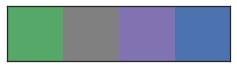

In [4]:
species = [ 'Ea', 'Pa', 'Pch', 'Pci', 'Pf', 'Pp' , 'Pv', 'Sm']
order = [1, 4, 2, 3, 7, 0, 6, 5]
species_colors = array(array2colors(arange(8), cmap=cm.Accent))[order]
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

p=sns.color_palette(n_colors=4)

acc_colors = {
'majority' : mpl.colors.hex2color(mpl.colors.cnames['gray']),
'rule2': p[0],
'rule3': p[1],
'gLV': p[3]
}

sns.palplot(acc_colors.values())


fig_out_path = '../manuscript/figures/panels/'

# Main text

## Pariwise network

In [15]:
from TernPlot import TernPloter, NetPloter, make_interaction_network
outcomes_34 = pd.read_pickle('2015-05-21.EXP_34-Trio_competition/pair_outcomes.pick')
pair_frac_avg_34 = pd.read_pickle('2015-05-21.EXP_34-Trio_competition/pair_frac_avg.pick')

outcomes = outcomes_34.copy()
outcomes.loc['Pa', 'Pch'] = 'Pch'
outcomes.loc['Pch', 'Pa'] = 'Pch'

outcomes

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
Ea,Ea,COX,COX,COX,COX,COX,COX,Ea
Pa,COX,Pa,Pch,Pa,COX,COX,COX,COX
Pch,COX,Pch,Pch,Pch,Pch,COX,COX,COX
Pci,COX,Pa,Pch,Pci,COX,Pp,Pv,COX
Pf,COX,COX,Pch,COX,Pf,COX,COX,COX
Pp,COX,COX,COX,Pp,COX,Pp,Pp,Pp
Pv,COX,COX,COX,Pv,COX,Pp,Pv,COX
Sm,Ea,COX,COX,COX,COX,Pp,COX,Sm


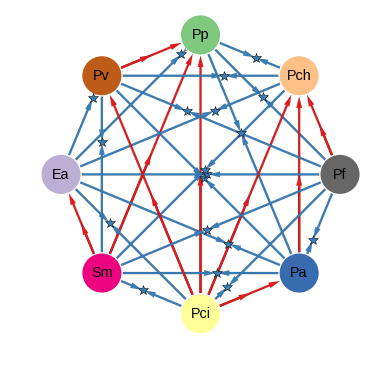

In [217]:
fig, ax = subplots(figsize=(6,6))
sps = species

opt = {'head_width': .04, 'head_length': 0.08, 'width': 0.015,
        'length_includes_head': True, 'ec':'k', 'linewidth':.1}

order = ['Pf', 'Pch', 'Pp', 'Pv', 'Ea', 'Sm', 'Pci', 'Pa']
# order=species[::-1]
# order=species

vert_defaults={'radius':.15, 'lw':1}
vert_defaults={'radius':.14, 'lw':0}

tmp = outcomes.reindex(sps,sps)
net = make_interaction_network(tmp, pair_frac_avg_34)
np_all = NetPloter(net=net, species_colors=species_colors_d, ax=ax, arrow_opt=opt, style='new', order=order)
np_all.plot_net_boundry(offset=.15, vert_defaults=vert_defaults, 
                        text_kwargs={'size':'large'})

t = 1.2
ax.set_xlim(-t,t)
ax.set_ylim(-t,t)


# ax.text(.1, 1., 'd', size=24, clip_on=False, transform=ax.transAxes,
#        ha='right', va='bottom')

savefig(fig_out_path + 'Fig_2.panel_d.pdf', dpi=300, bbox_inches='tight')

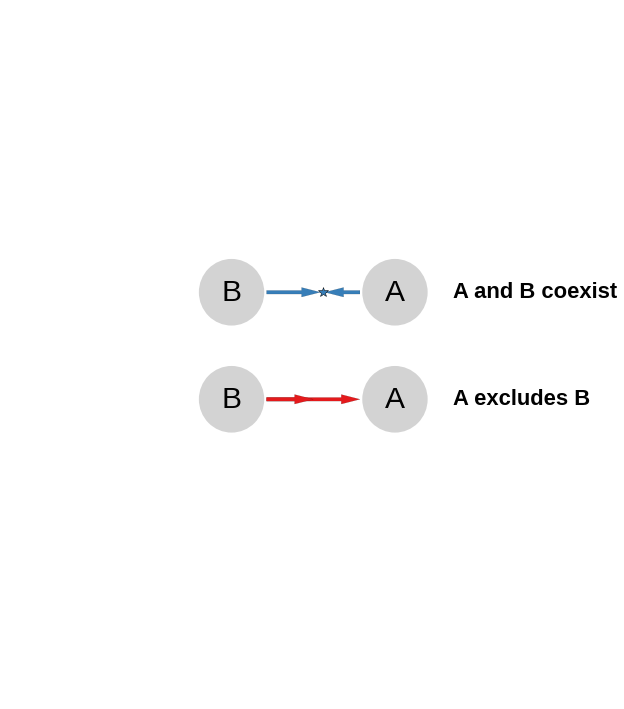

In [218]:
# fig, ax = subplots(figsize=(6,6))
sps = ['A','B']
s1, s2 = sps

fig, axs = subplots(2,1,figsize=(8.5,10))

for i,ax in enumerate(axs):
    if i:
        tmp = pd.DataFrame([[s1, s1],[s1, s2]], columns=sps, index=sps)
        lbl = 'A excludes B'
    else:
        tmp = pd.DataFrame([[s1, 'COX'],['COX', s2]], columns=sps, index=sps)
        lbl = 'A and B coexist'
    net = make_interaction_network(tmp)
    
    c = 'lightgray'
    sps_colors = {'A': c, 'B':c}
    
    w = .35
    y = 1
    pos = pd.DataFrame([[-w,0],[w,0]], columns=['x','y'], index=[s2,s1])

    np_all = NetPloter(net=net, pos=pos, species_colors=sps_colors, ax=ax, arrow_opt=opt, style='new')
    np_all.plot_net_boundry(offset=.15, vert_defaults=vert_defaults, 
                            text_kwargs={'size':30})

    t = 1.2
    ax.set_xlim(-t,t)
    ax.set_ylim(-t,t)
    
    ax.text(w+.25, 0, lbl, color='k', size=22, va='center', ha='left', weight='bold')

tight_layout(h_pad=-40)
savefig(fig_out_path + 'Fig_2.legend.pdf', dpi=300, bbox_inches='tight')

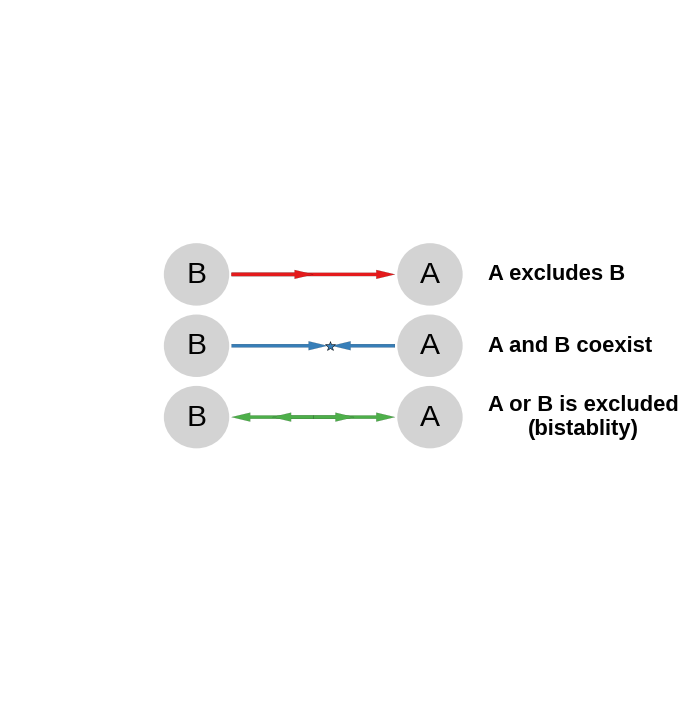

In [90]:
# fig, ax = subplots(figsize=(6,6))
sps = ['A','B']
s1, s2 = sps

fig, axs = subplots(3,1,figsize=(8.5,10))

for i,ax in enumerate(axs):
    if i==0:
        tmp = pd.DataFrame([[s1, s1],[s1, s2]], columns=sps, index=sps)
        lbl = 'A excludes B'
    elif i==1:
        tmp = pd.DataFrame([[s1, 'COX'],['COX', s2]], columns=sps, index=sps)
        lbl = 'A and B coexist'
    else:
        tmp = pd.DataFrame([[s1, 'BIS'],['BIS', s2]], columns=sps, index=sps)
        lbl = 'A or B is excluded' +'\n' + '(bistablity)' 
    net = make_interaction_network(tmp)
    
    c = 'lightgray'
    sps_colors = {'A': c, 'B':c}
    
    w = .5
    y = 1
    pos = pd.DataFrame([[-w,0],[w,0]], columns=['x','y'], index=[s2,s1])

    np_all = NetPloter(net=net, pos=pos, species_colors=sps_colors, ax=ax, arrow_opt=opt, style='new')
    np_all.plot_net_boundry(offset=.15, vert_defaults=vert_defaults, 
                            text_kwargs={'size':30})

    t = 1.2
    ax.set_xlim(-t,t)
    ax.set_ylim(-t,t)
    
    ax.text(w+.25, 0, lbl, color='k', size=22, va='center', ha='left', weight='bold', ma='center')

tight_layout(h_pad=-40)
savefig(fig_out_path + 'arrow_legend.bistable.png', dpi=300, bbox_inches='tight')

## Pair time trajectories 

In [46]:
def mask_data(data, layout):
    data = data.copy()
    for t in data.labels:
        for r in data.items:
            for c in data.major_axis:
                sps_in = layout.loc[r,c]
                s_in = data.loc[t,r, c, sps_in].sum()
                s_all = data.loc[t,r, c].sum()

                if (s_in==0) or (s_all!=s_in):
                    data.loc[t,r,c] = nan            
    return data


def norm_fun(x):
    if x.sum()==0:
        return 0*x
    else:
        return 1.*x/x.sum()
   

def dir_std(a):
    a0 = a.sum()
    dir_var = a*(a0-a)/a0**2/(a0+1)
    return dir_var**0.5



xls_file = '../data/colony_counts/2015-07-01_EXP35_counts.xlsx'
xls = pd.ExcelFile(xls_file)

plates = ['1_A', '1_B', '2_A', '2_B']
times = arange(6)
all_counts = {}

for p in plates:
    plate_d = {}
    for t in times:
        tmp = xls.parse('P_%s_t%d'%(p,t), index_col=0, na_values=['na'], parse_cols=9).fillna(0)
        ind = tmp.applymap(lambda x:x=='na')
        tmp[ind] = nan
        row, col = zip( *[(ind[0], int(ind[1:])) for ind in tmp.index] )
        tmp['Row'] = row
        tmp['Col'] = col
        plate_d[t] = tmp.set_index(['Row','Col']).to_panel().transpose(1,2,0)
#     pair_counts_tmp[p] = pd.Panel4D(tmp_d).swapaxes(1,2).swapaxes(2,3).iloc[:,:,:9]
    all_counts[p] = pd.Panel4D(plate_d)



## plate layouts
xls_file = '../data/colony_counts/2015-07-01_EXP35_counts.xlsx'
xls = pd.ExcelFile(xls_file)

plate_layout = {}
for p in [1,2]:
    t = xls.parse('Plate_%d_layout'%p, index_col=0, header=0, na_values=['na'], parse_cols=13).fillna('')
    tt = t.applymap(lambda x:x.split(' ')[0].split('/'))
    plate_layout[p] = tt.applymap(lambda x: x if x[0] else [] )

all_counts_masked = {}
for p,v in all_counts.iteritems():
    i = int(p[0])
    all_counts_masked[p] = mask_data(all_counts[p], plate_layout[i])
    
pair_counts = {p:all_counts_masked[p].loc[:,:'E',:8] for p in ['1_A', '1_B']}

pair_fracs = {p:c.apply(norm_fun, axis=3, ) for p,c in pair_counts.iteritems()}

pair_fracs_std = {p:c.apply(dir_std, axis=3, ) for p,c in pair_counts.iteritems()}

C:\Users\mitadm\Anaconda2\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\mitadm\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 
Panel4D is deprecated and will be removed in a future version.
The recommended way to represent these types of n-dimensional data are with
the `xarray package <http://xarray.pydata.org/en/stable/>`__.
Pandas provides a `.to_xarray()` method to help automate this conversion.



In [47]:
def line_plot(df, ax, cmap=cm.Accent, **kwargs):
    n_lines = df.shape[0]
    cs = array2colors(arange(n_lines), cmap=cmap)
    ax.set_color_cycle(cs)
    out = ax.plot(df.T, lw=3, marker='o', ms=10)
    return out

def errorbar_plot(df, er, ax, c=None, cmap=cm.Accent, **kwargs):
    n_lines = df.shape[0]
    if c is None:
        cs = array2colors(arange(n_lines), cmap=cmap)
    elif hasattr(c, '__iter__'):
        cs = c
    else:
        cs = [c]*n_lines
    kwargs.setdefault('lw',3)
    kwargs.setdefault('marker','o')
    kwargs.setdefault('ms',10)
    kwargs.setdefault('lw',3)
    kwargs.setdefault('ls','-')
    for i,(sp,y) in enumerate(df.iterrows()):
        x = asarray(y.index)
        yerr = er.ix[sp]
        c = cs[i]
        out = ax.errorbar(x,y, yerr=yerr, color=c, ecolor=c, 
#                          lw=3, marker='o', ms=10, 
                         label=sp,
                         **kwargs)
    return out

pairs = [
('Pa', 'Pch'),
('Pa', 'Pp'),
('Pp', 'Pv'),
('Ea', 'Pp'),
('Ea', 'Pv'),
('Pa', 'Pf'),
('Pch', 'Pf'),
('Pv', 'Sm'),
]

In [52]:
## save data
xcl_file = '../manuscript/data/Fig2C_timeSeries.xlsx'
writer = pd.ExcelWriter(xcl_file)
pairs_2_plot = (2,1,0 )
for i in pairs_2_plot:
    if i==1:
        sp2,sp1 = pairs[i]
    else:
        sp1,sp2 = pairs[i]
    s1,s2 = [species.index(sp1), species.index(sp2)]
    f = pd.Panel({1:pair_fracs['1_A'].iloc[:,:,i,s1], 2:pair_fracs['1_B'].iloc[:,:,i,s1]}).mean(axis=0)
    er = dir_std(c)
    f.to_excel(writer, sheet_name='_'.join([sp1, sp2, 'fractions']))
    er.to_excel(writer, sheet_name='_'.join([sp1, sp2, 'error']))
writer.close()

Pp Pv
        0         1         2         3         4         5
Row                                                        
A    0.95  0.950231  0.994118  1.000000  1.000000  1.000000
B    0.75  0.910225  0.941734  0.990909  1.000000  1.000000
C    0.50  0.814737  0.857143  0.974969  1.000000  1.000000
D    0.25  0.787469  0.900784  0.991667  0.989011  0.993902
E    0.05  0.504717  0.780685  0.950180  0.985915  1.000000
Pp Pa
        0         1         2         3         4         5
Row                                                        
A    0.05  0.677489  0.673836  0.686275  0.677778  0.593983
B    0.25  0.691131  0.653934  0.670461  0.576923  0.625374
C    0.50  0.677966  0.720452  0.661411  0.738462  0.614724
D    0.75  0.725996  0.690217  0.606140  0.631579  0.575790
E    0.95  0.865079  0.682321  0.666197  0.653333  0.663753
Pa Pch
        0         1    2    3    4    5
Row                                    
A    0.95  0.026316  0.0  0.0  0.0  0.0
B    0.75  0.000000  

C:\Users\mitadm\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


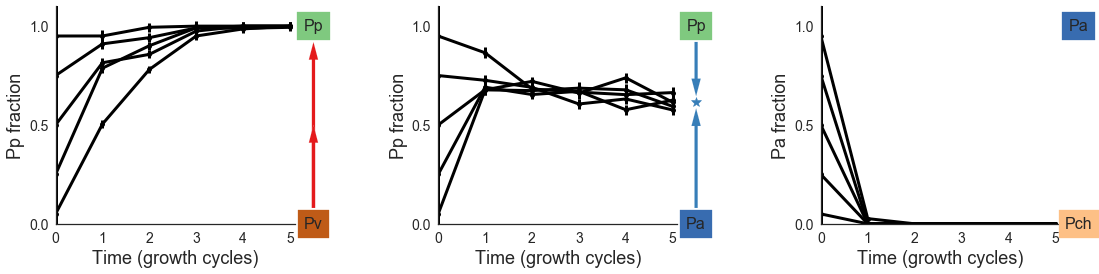

In [55]:
titles = ('Competitive Exclusion', 'Coexistence')

sns.set_style('white')

pairs_2_plot = (2,1,0)
n = len(pairs_2_plot)
fig, axs = subplots(1,n, figsize=(6*n,4))
for ind,ax in enumerate(axs):
    i = pairs_2_plot[ind]
    if i==1:
        sp2,sp1 = pairs[i]
    else:
        sp1,sp2 = pairs[i]
    s1,s2 = [species.index(sp1), species.index(sp2)]
    c = pd.Panel({1:pair_counts['1_A'].iloc[:,:,i,s1], 2:pair_counts['1_B'].iloc[:,:,i,s1]}).mean(axis=0)
    f = pd.Panel({1:pair_fracs['1_A'].iloc[:,:,i,s1], 2:pair_fracs['1_B'].iloc[:,:,i,s1]}).mean(axis=0)
    er = dir_std(c)
    out = errorbar_plot(f, er, ax, c='k', lw=3, ms=5)


#     ax.set_title(titles[ind], size=24, va='bottom')

    xlbl = ax.set_xlabel('Time (growth cycles)', size=18, va='top')
    ylbl = ax.set_ylabel('%s fraction'%species[s1], size=18)


    ax.set_yticks([0, .25, .5, .75, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylim(0, 1.1)
    ax.set_xlim(0, 5.1)

    if ind==0:
        arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
                'length_includes_head': True, 'ec':'w', 'linewidth':.1,
                'color':'#e41a1c'}

        origin = {'x':5.5, 'y':0.08}
        target = {'x':5.5, 'y':.92}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)
        
        target = {'x':5.5, 'y':.5}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)
        
#         target = {'x':5.5, 'y':.62}
#         ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
#                  clip_on=False, **arrow_opt)
    
    elif ind==1:
        arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
            'length_includes_head': True, 'ec':'w', 'linewidth':.1,
            'color':'#377eb8'}
        
        f_avg = f.iloc[:,-1].mean()
        origin = {'x':5.5, 'y':0.08}
        target = {'x':5.5, 'y':f_avg-.03}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        origin = {'x':5.5, 'y':0.92}
        target = {'x':5.5, 'y':f_avg+.03}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        ax.plot(5.5, f_avg, '*', ms=10, c='#377eb8', clip_on=False, mew=.5)
        
    ax.text(5.5, 1.0, species[s1], size=16,
            ha='center', va='center', backgroundcolor=species_colors[s1])
    ax.text(5.5, .0, species[s2], size=16,
            ha='center', va='center', backgroundcolor=species_colors[s2])
    
    ax.set_yticks([0,.5,1])
    xtlbls, ytlbls = ax.get_xticklabels(), ax.get_yticklabels()
    setp([xtlbls, ytlbls], size=14)
    
subplots_adjust(wspace=.6)


# savefig(fig_out_path + 'pair_trajectories.eps', dpi=300, bbox_inches='tight')

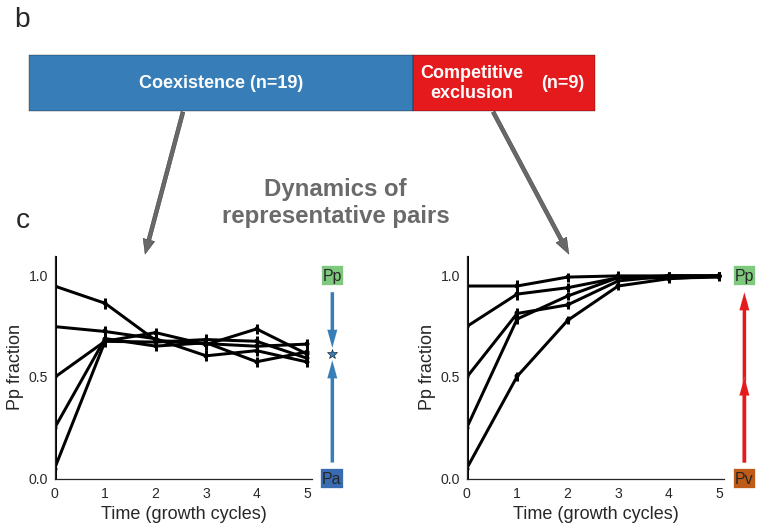

In [224]:
fig, axs = subplots(1,2, figsize=(12,4))

sns.set_style('white')

pairs_2_plot = (1,2)
for ind,ax in enumerate(axs):
    i = pairs_2_plot[ind]
    if i==2:
        sp1,sp2 = pairs[i]
    else:
        sp2,sp1 = pairs[i]
    s1,s2 = [species.index(sp1), species.index(sp2)]
    c = pd.Panel({1:pair_counts['1_A'].iloc[:,:,i,s1], 2:pair_counts['1_B'].iloc[:,:,i,s1]}).mean(axis=0)
    f = pd.Panel({1:pair_fracs['1_A'].iloc[:,:,i,s1], 2:pair_fracs['1_B'].iloc[:,:,i,s1]}).mean(axis=0)
    er = dir_std(c)
    out = errorbar_plot(f, er, ax, c='k', lw=3, ms=5)


#     ax.set_title(titles[ind], size=24, va='bottom')

    xlbl = ax.set_xlabel('Time (growth cycles)', size=18, va='top')
    ylbl = ax.set_ylabel('%s fraction'%species[s1], size=18)


    ax.set_yticks([0, .25, .5, .75, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylim(0, 1.1)
    ax.set_xlim(0, 5.1)

    if ind==1:
        arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
                'length_includes_head': True, 'ec':'w', 'linewidth':.1,
                'color':'#e41a1c'}

        origin = {'x':5.5, 'y':0.08}
        target = {'x':5.5, 'y':.92}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)
        
        target = {'x':5.5, 'y':.5}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)
        
#         target = {'x':5.5, 'y':.62}
#         ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
#                  clip_on=False, **arrow_opt)
    
    elif ind==0:
        arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
            'length_includes_head': True, 'ec':'w', 'linewidth':.1,
            'color':'#377eb8'}
        
        f_avg = f.iloc[:,-1].mean()
        origin = {'x':5.5, 'y':0.08}
        target = {'x':5.5, 'y':f_avg-.03}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        origin = {'x':5.5, 'y':0.92}
        target = {'x':5.5, 'y':f_avg+.03}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        ax.plot(5.5, f_avg, '*', ms=10, c='#377eb8', clip_on=False, mew=.5)
        
    ax.text(5.5, 1.0, species[s1], size=16,
            ha='center', va='center', backgroundcolor=species_colors[s1])
    ax.text(5.5, .0, species[s2], size=16,
            ha='center', va='center', backgroundcolor=species_colors[s2])
    
    ax.set_yticks([0,.5,1])
    xtlbls, ytlbls = ax.get_xticklabels(), ax.get_yticklabels()
    setp([xtlbls, ytlbls], size=14)
    
subplots_adjust(wspace=.6)

## add bar
cs = ['#377eb8', '#e41a1c', ]

w_tot = 2.2
n_outcomes = pd.Series([19, 9], index=['Coexistence', 'Competitive exclusion'])
f = 1.*n_outcomes/n_outcomes.sum()
ws = w_tot*f
left_tot = -.1
ls = left_tot + array([0, ws[0]])
mids = ls+ws/2
h = .25
bottom = 1.65

for i in range(2):
    rec = mpl.patches.Rectangle((ls[i], bottom), ws[i], h,  fc=cs[i], clip_on=False, zorder=10,
                                transform=axs[0].transAxes)  

    axs[0].add_patch(rec)
    
    
axs[0].text(mids[0], bottom+h/2 , r'Coexistence (n=19)', size=18, weight='bold', 
    va='center', ha='center', color='w', transform=axs[0].transAxes, clip_on=False, zorder=10) 

axs[0].text(ls[1]+.03, bottom+h/2 , 'Competitive\nexclusion', size=18, weight='bold', 
    va='center', ha='left', ma='center', color='w', transform=axs[0].transAxes, clip_on=False, zorder=10) 

axs[0].text(ls[1]+.5, bottom+h/2 , '(n=9)', size=18, weight='bold', 
    va='center', ha='left', ma='center', color='w', transform=axs[0].transAxes, clip_on=False, zorder=10)


## add arrows and title

s = 'Dynamics of' + '\n' + 'representative pairs'
fig.text(.45, 1, s, ha='center', va='bottom', ma='center', clip_on=False, size=24, weight='bold', 
        color='dimgray')


axs[0].annotate('',xy=(.35, 1), xytext=(.5, bottom), annotation_clip=False,
                arrowprops=dict(facecolor='dimgray', shrink=0.01, ),
               textcoords='axes fraction', xycoords='axes fraction')

axs[0].annotate('',xy=(2, 1), xytext=(1.7, bottom), annotation_clip=False,
                arrowprops=dict(facecolor='dimgray', shrink=0.01, ),
               textcoords='axes fraction', xycoords='axes fraction')

## add panel number
ax = axs[0] 
ax.text(-.1, 2., 'b', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax.text(-.1, 1.1, 'c', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

savefig(fig_out_path + 'Fig_2.panels_bc.pdf', dpi=300, bbox_inches='tight')

## Pair outcomes bar 

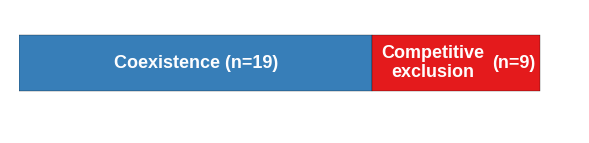

In [36]:
n_outcomes = pd.DataFrame([[19, 9]], columns=['Coexistence', 'Competitive exclusion'])

sns.set_style('white')
fig, ax = subplots(figsize=(10,2))

cs = ['#377eb8', '#e41a1c', ]
n_outcomes.plot(kind='barh', ax=ax, stacked=True, legend=False, color=cs)

x = 19/2.
ax.text(x, 0, r'Coexistence (n=19)', size=18, weight='bold', 
        va='center', ha='center', color='w')

x = 19+.5
ax.text(x, 0, 'Competitive\nexclusion', size=18, weight='bold', 
        va='center', ha='left', color='w', ma='center')

x+=6
ax.text(x, 0, '(n=9)', size=18, weight='bold', 
        va='center', ha='left', color='w')

ax.set_axis_off()

# savefig(fig_out_path + 'pair_outcomes_bar.eps', dpi=300, bbox_inches='tight')


## Trio trajectories

In [22]:
trios = [
('Ea','Pci','Pv'),
('Ea','Pv','Sm'),
('Pa','Pch','Pf'),
('Ea','Pa','Pf'),
('Ea','Pch','Pf'),
('Ea','Pch','Pp'),
('Pa','Pch','Pv'),
('Pf','Pp','Pv'),
('Ea','Pa','Sm'),
('Ea','Pci','Sm'),
('Pa','Pch','Pp'),
('Pa','Pch','Sm'),
('Pa','Pf','Sm'),
('Pa','Pp','Sm'),
('Pa','Pv','Sm'),
('Pch','Pp','Pv'),
('Pch','Pp','Sm'),
('Pp','Pv','Sm'),
]
trio_plate_num = [1]*8 + [2]*10


all_counts_masked = {}
for p,v in all_counts.iteritems():
    i = int(p[0])
    all_counts_masked[p] = mask_data(all_counts[p], plate_layout[i])
    
all_fracs_masked = {p:c.apply(norm_fun, axis=3, ) for p,c in all_counts_masked.iteritems()}


def get_trio_data(trio, rep):
    if hasattr(trio, '__iter__'):
        trio_set = set(trio)
        t = filter(lambda x: set(x)==trio_set, trios)[0]
        i = trios.index(t)
    else:
        i = trio
    sps = list(trios[i])
    p_num = trio_plate_num[i]
    l = plate_layout[p_num]
    rr,cc = where(l.applymap(lambda x:x==sps))
    n = len(rr)
    p = '%d_%s'%(p_num,rep)
    trio_fracs = pd.Panel(zeros((6,n,8)), minor_axis=species)
    trio_counts = trio_fracs.copy()
    for i,(r,c) in enumerate(zip(rr,cc)):
        trio_fracs.iloc[:,i] = all_fracs_masked[p].iloc[:,r,c]
        trio_counts.iloc[:,i] = all_counts_masked[p].iloc[:,r,c]
    return trio_fracs, trio_counts

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 7 (major_axis) x 8 (minor_axis)
Items axis: 0 to 5
Major_axis axis: 0 to 6
Minor_axis axis: Ea to Sm
<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 7 (major_axis) x 8 (minor_axis)
Items axis: 0 to 5
Major_axis axis: 0 to 6
Minor_axis axis: Ea to Sm


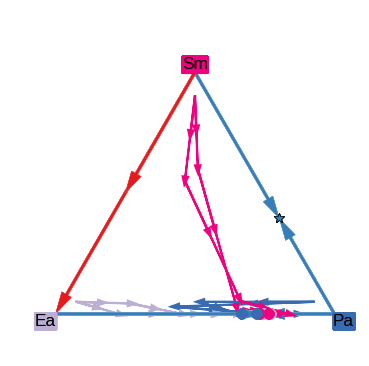

In [23]:
i = 16
@interact(i=(0,17))
def plot_rio_tern(i):
    sps = list(trios[i])
    cs = [species_colors_d[sp] for sp in sps]
    tmp = outcomes.reindex(sps,sps)
    net = make_interaction_network(tmp, pair_frac_avg_34)
    fig, ax = subplots(figsize=(6,6))
    for rep in ['A', 'B']:
        trio_fracs, trio_counts = get_trio_data(i, rep)
        tp = TernPloter(ax=ax, species_colors=species_colors_d, net=net, style='new')

        
        print trio_fracs
        for j in range(3):
            tp.plot(trio_fracs.loc[[5],j, sps].T, lw=2, marker='o', ms=12, alpha=1, color=cs[j], plot_func='plot')
            tp.plot(trio_fracs.loc[:,j, sps].T, color=cs[j], plot_func='arrow_path', lw=2, fs=[0.05, .6])

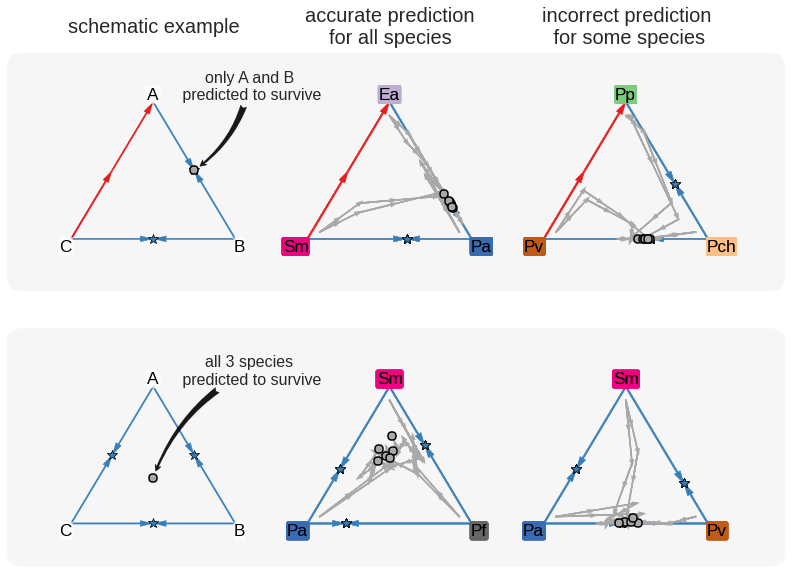

In [212]:
FancyBboxPatch = mpl.patches.FancyBboxPatch

to_plot = [
(['Sm', 'Pa', 'Ea'], 8),
(['Sm', 'Pa', 'Ea'], 8),
(['Pv', 'Pch', 'Pp'], 15),
(['Pa', 'Pf', 'Sm'], 12),
(['Pa', 'Pf', 'Sm'], 12),
(['Pa', 'Pv', 'Sm'], 14),

]


# c = 'burlywood'
c = 'darkgray'
# c = 'None'
c_end = 'DarkSlateGray'
c_end = 'k'

w = 4
hspace = .5
fig, axs = subplots(2, 3, figsize=(3*w, 2*w+hspace)) 

subplots_adjust(hspace=hspace)

e = .03

x = .05
y = .5 + e
pad = .02
box = FancyBboxPatch((x+pad+.02, y+pad), 1-2*(x+pad), .45-2*pad - 2*e,  fc="lightgray", clip_on=False, zorder=-100, 
                     transform=fig.transFigure, boxstyle="round,pad=%.2f"%pad, alpha=.2, lw=0)
fig.patches.append(box)

y = .05 + e
box = FancyBboxPatch((x+pad+.02, y+pad), 1-2*(x+pad), .45-2*pad - 2*e,  fc="lightgray", clip_on=False, zorder=-100, 
                     transform=fig.transFigure, boxstyle="round,pad=%.2f"%pad, alpha=.2, lw=0)
fig.patches.append(box)

for k,(sps,i) in enumerate(to_plot):
    row, col = unravel_index(k, (2,3))
    ax = axs[row,col]
    
    if col==0:
        sps = ['C', 'B', 'A']
        if row==0:
            tmp = pd.DataFrame([['A', 'COX', 'A'], ['COX', 'B', 'COX'], ['A', 'COX', 'C']], 
                               index=sps, columns=sps)
        else:
            tmp = pd.DataFrame([['A', 'COX', 'COX'], ['COX', 'B', 'COX'], ['COX', 'COX', 'C']], 
                   index=sps, columns=sps)
        net = make_interaction_network(tmp, .5)

        cs = {s:'w' for s in sps}
        tp = TernPloter(ax=ax, species_colors=cs, net=net, style='new')
        tp.plot_net_boundry(sps, label_vertices=True)
        pred_vals = [1./3, 1./3, 1./3] if row else [0, 1./2, 1./2]
        pred = pd.DataFrame([pred_vals], columns=sps) 
        tp.plot(pred, lw=.1, mec='k', mew=1.5, marker='o', ms=8, alpha=1, color=c, 
                plot_func='plot', zorder=10, label_vertices=False)
    
    else:
        cs = [species_colors_d[sp] for sp in  list(trios[i])]
        tmp = outcomes.reindex(sps,sps)
        net = make_interaction_network(tmp, pair_frac_avg_34)
        
        for rep in ['A', 'B']:
            trio_fracs, trio_counts = get_trio_data(i, rep)
            tp = TernPloter(ax=ax, species_colors=species_colors_d, net=net, style='new')
            tp.plot_net_boundry(sps)
            for j in range(3):
    #             c = cs[j]
                tp.plot(trio_fracs.loc[[5],j, sps].T, lw=.1, mec=c_end, mew=1.5,
                        marker='o', ms=8, alpha=1, color=c, plot_func='plot', zorder=10)
                tp.plot(trio_fracs.loc[:,j, sps].T, color=c, plot_func='arrow_path', 
                        lw=1.5, fs=[0.05, .6], zorder=5)

    sps_str = '_'.join(sorted(sps))



label = 'assembly rule\n prediction'
label = 'assembly rule predicts\n survival of A & B only'
label = 'only A and B\n predicted to survive'
ax = axs[0,0]
frame = pd.DataFrame([[0, .5, .5]])
xy = tp.get_barycentric_coords(frame).values[0]
xytext = xy+ array([-.0, .3])
xytext = xy+ array([-.1, .45])
ax.annotate(label, xy=xy, xytext=xytext, size=16,
           xycoords='data', textcoords='data', ma='center',
           arrowprops=dict(arrowstyle="fancy",connectionstyle='arc3,rad=-0.2', 
                           shrinkB=7, fc='k', alpha=.9))

label = 'assembly rule predicts\n survival of all 3 species'
label = 'all 3 species\n predicted to survive'
ax = axs[1,0]
frame = pd.DataFrame([[1./3]*3])
xy = tp.get_barycentric_coords(frame).values[0]
# xytext = xy+ array([.2, .45])
ax.annotate(label, xy=xy, xytext=xytext, size=16,
           xycoords='data', textcoords='data', ma='center',
           arrowprops=dict(arrowstyle="fancy",connectionstyle='arc3,rad=0.2', 
                           shrinkB=7, fc='k', alpha=.9))

labels = ['schematic example', 
          'accurate prediction\nfor all species', 
          'incorrect prediction\n for some species']
for ax, l in zip(axs[0], labels):  
    ax.text(0.5, 1.2, l, transform=ax.transAxes, 
            size=20, va='center', ha='center', ma='center')
   

# savefig(fig_out_path + 'trio_trajectories.eps', dpi=300, bbox_inches='tight')

###  Revision

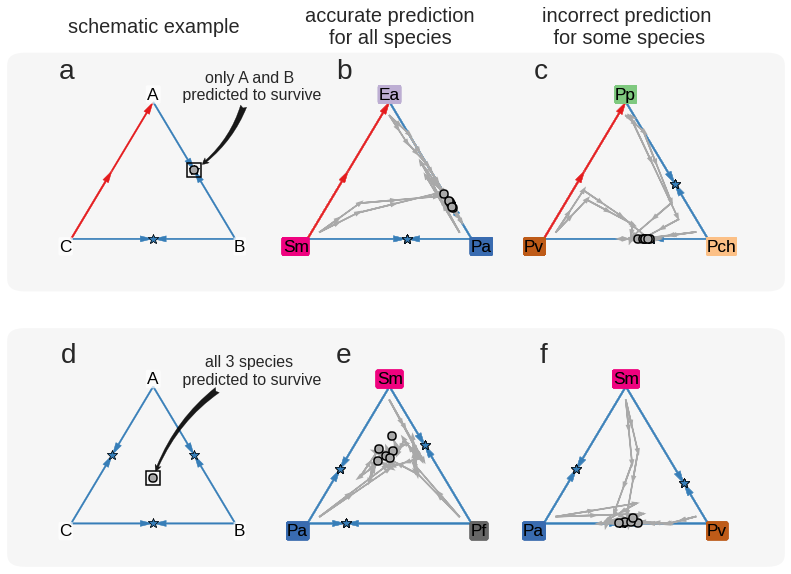

In [215]:
FancyBboxPatch = mpl.patches.FancyBboxPatch

to_plot = [
(['Sm', 'Pa', 'Ea'], 8),
(['Sm', 'Pa', 'Ea'], 8),
(['Pv', 'Pch', 'Pp'], 15),
(['Pa', 'Pf', 'Sm'], 12),
(['Pa', 'Pf', 'Sm'], 12),
(['Pa', 'Pv', 'Sm'], 14),

]


# c = 'burlywood'
c = 'darkgray'
# c = 'None'
c_end = 'DarkSlateGray'
c_end = 'k'

w = 4
hspace = .5
fig, axs = subplots(2, 3, figsize=(3*w, 2*w+hspace)) 

subplots_adjust(hspace=hspace)

e = .03

x = .05
y = .5 + e
pad = .02
box = FancyBboxPatch((x+pad+.02, y+pad), 1-2*(x+pad), .45-2*pad - 2*e,  fc="lightgray", clip_on=False, zorder=-100, 
                     transform=fig.transFigure, boxstyle="round,pad=%.2f"%pad, alpha=.2, lw=0)
fig.patches.append(box)

y = .05 + e
box = FancyBboxPatch((x+pad+.02, y+pad), 1-2*(x+pad), .45-2*pad - 2*e,  fc="lightgray", clip_on=False, zorder=-100, 
                     transform=fig.transFigure, boxstyle="round,pad=%.2f"%pad, alpha=.2, lw=0)
fig.patches.append(box)

for k,(sps,i) in enumerate(to_plot):
    row, col = unravel_index(k, (2,3))
    ax = axs[row,col]
    
    if col==0:
        sps = ['C', 'B', 'A']
        if row==0:
            tmp = pd.DataFrame([['A', 'COX', 'A'], ['COX', 'B', 'COX'], ['A', 'COX', 'C']], 
                               index=sps, columns=sps)
        else:
            tmp = pd.DataFrame([['A', 'COX', 'COX'], ['COX', 'B', 'COX'], ['COX', 'COX', 'C']], 
                   index=sps, columns=sps)
        net = make_interaction_network(tmp, .5)

        cs = {s:'w' for s in sps}
        tp = TernPloter(ax=ax, species_colors=cs, net=net, style='new')
        tp.plot_net_boundry(sps, label_vertices=True)
        pred_vals = [1./3, 1./3, 1./3] if row else [0, 1./2, 1./2]
        pred = pd.DataFrame([pred_vals], columns=sps) 
        tp.plot(pred, lw=.1, mec='k', mew=1.5, marker='o', ms=8, alpha=1, color=c, 
                plot_func='plot', zorder=10, label_vertices=False)
        
        tp.plot(pred, lw=.1, mec='k', mew=1.5, marker='s', ms=14, alpha=1, color='none', 
                plot_func='plot', zorder=10, label_vertices=False)
        
    
    else:
        cs = [species_colors_d[sp] for sp in  list(trios[i])]
        tmp = outcomes.reindex(sps,sps)
        net = make_interaction_network(tmp, pair_frac_avg_34)
        
        for rep in ['A', 'B']:
            trio_fracs, trio_counts = get_trio_data(i, rep)
            tp = TernPloter(ax=ax, species_colors=species_colors_d, net=net, style='new')
            tp.plot_net_boundry(sps)
            for j in range(3):
    #             c = cs[j]
                tp.plot(trio_fracs.loc[[5],j, sps].T, lw=.1, mec=c_end, mew=1.5,
                        marker='o', ms=8, alpha=1, color=c, plot_func='plot', zorder=10)
                tp.plot(trio_fracs.loc[:,j, sps].T, color=c, plot_func='arrow_path', 
                        lw=1.5, fs=[0.05, .6], zorder=5)

    sps_str = '_'.join(sorted(sps))



label = 'assembly rule\n prediction'
label = 'assembly rule predicts\n survival of A & B only'
label = 'only A and B\n predicted to survive'
ax = axs[0,0]
frame = pd.DataFrame([[0, .5, .5]])
xy = tp.get_barycentric_coords(frame).values[0]
xytext = xy+ array([-.0, .3])
xytext = xy+ array([-.1, .45])
ax.annotate(label, xy=xy, xytext=xytext, size=16,
           xycoords='data', textcoords='data', ma='center',
           arrowprops=dict(arrowstyle="fancy",connectionstyle='arc3,rad=-0.2', 
                           shrinkB=10, fc='k', alpha=.9))

label = 'assembly rule predicts\n survival of all 3 species'
label = 'all 3 species\n predicted to survive'
ax = axs[1,0]
frame = pd.DataFrame([[1./3]*3])
xy = tp.get_barycentric_coords(frame).values[0]
# xytext = xy+ array([.2, .45])
ax.annotate(label, xy=xy, xytext=xytext, size=16,
           xycoords='data', textcoords='data', ma='center',
           arrowprops=dict(arrowstyle="fancy",connectionstyle='arc3,rad=0.2', 
                           shrinkB=7, fc='k', alpha=.9))

labels = ['schematic example', 
          'accurate prediction\nfor all species', 
          'incorrect prediction\n for some species']
for ax, l in zip(axs[0], labels):  
    ax.text(0.5, 1.2, l, transform=ax.transAxes, 
            size=20, va='center', ha='center', ma='center')
   

# add panel numbers
ax = axs[0,0] 
panels = 'abcdef'

for i,p in enumerate(panels):
    ax = axs.flat[i]
    x = .3 if p in['b','e'] else .1
    ax.text(x, .9, p, size=28, clip_on=False, transform=ax.transAxes,
           ha='right', va='bottom')

savefig(fig_out_path + 'Fig_3.panels_abcdef.pdf', dpi=300, bbox_inches='tight')

## Trio prediction quality 

In [11]:
err = pd.Series.from_csv('sim/Rule_accuracy_LV_trio.new.csv')
err_all_survive = pd.Series.from_csv('sim/Majority_accuracy_LV_trio.new.csv')

## observed all survive accuracy
mistakes = 22 + 1 + 1 + 4 + 7 + 5 + 6 
accuracy_all_survive_trios  = 1-1.*mistakes/(56*3)
accuracy_rule_trios = .895

In [12]:
from scipy import integrate, stats

kde = stats.gaussian_kde(1-err)
x = linspace(-1,2, 100)
print 'p pair = ', (1-err>accuracy_rule_trios).sum()/float(100)
print 'p pair kde = ',integrate.quad(kde.pdf, accuracy_rule_trios,2)[0]


p pair =  0.29
p pair kde =  0.293937505671


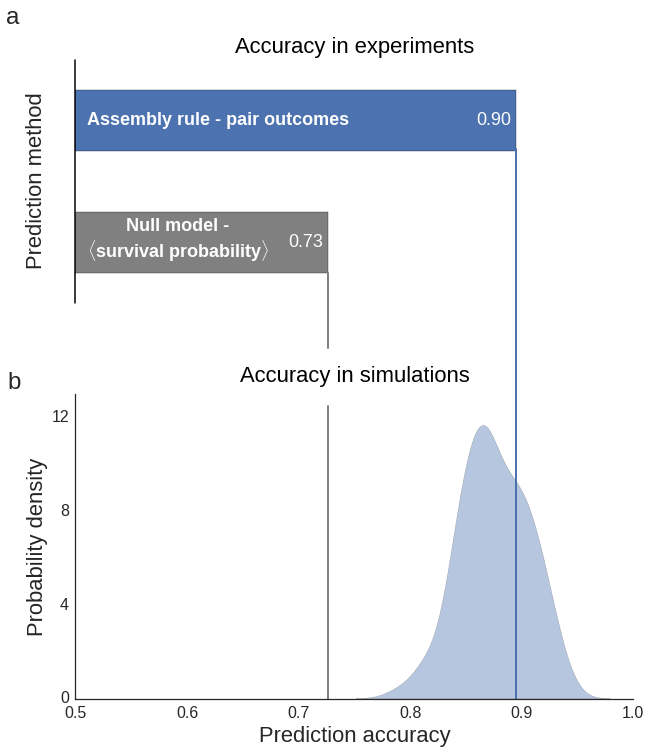

In [225]:
acc = pd.Series([accuracy_all_survive_trios, accuracy_rule_trios])

labels = ['majority', 'rule2', ]
acolors = [acc_colors[l] for l in labels]

sns.set_style('white')
fig, axs = subplots(2, 1, figsize=(10,12), sharex='col')

ax = axs[0]
acc.plot(kind='barh', color=acolors, ax=ax)


ax.set_ylim(-.75, 1.75)
ax.set_xlim(0.5,1)
ax.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax)
ax.set_yticks([])
ax.plot([0.5]*2, (-.5,1.5), '-k', lw=1.5, clip_on=False)

x =  0.51
ax.text(x, 0, 'Null model -\n$\\langle$survival probability$\\rangle$', size=18, weight='bold', 
        va='center', ha='left', ma='center', color='w')

ax.text(x, 1, r'Assembly rule - pair outcomes', size=18, weight='bold', 
        va='center', ha='left', color='w')

ax.text(.75, 1.6, 'Accuracy in experiments', size=22, 
        va='center', ha='center', ma='center', color='k')


ax.text(.75, -1.1, 'Accuracy in simulations', size=22, clip_on=False,
        va='center', ha='center', ma='center', color='k')

for i in [0,1]:
    ax.text(acc[i]-.005, i, '%.2f'%acc[i], size=18,
        va='center', ha='right', color='w')

ax.set_yticks([0,1])
ax.set_yticklabels([10,11], color='w')
setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('Prediction method', size=22)

ax=axs[1]

a = .4
# sns.kdeplot(1-err_all_survive, shade=True, lw=0, ax=ax, color=colors[0], alpha=a)
sns.kdeplot(1-err, shade=True, lw=0, ax=ax, color=acolors[1], alpha=a)

ax.plot([accuracy_all_survive_trios]*2, (15,18.2), '-', lw=2,c=acolors[0], clip_on=False)
ax.plot([accuracy_all_survive_trios]*2, (0,12.5), '-', lw=2,c=acolors[0], clip_on=False)
ax.plot([accuracy_rule_trios]*2, (0,23.5), '-', lw=2, c=acolors[1], clip_on=False)


ax.set_xticks(arange(.5, 1.1, .1))
ytcks = ax.set_yticks([0, 4, 8, 12])
setp(ax.get_xticklabels(), fontsize=16)
setp(ax.get_yticklabels(), fontsize=16)


ax.set_xlabel('Accuracy', size=20)
ax.set_xlim(0.5,1)
ax.set_ylim(0,13)

ax.set_ylabel('Probability density', size=22)
ax.set_xlabel('Prediction accuracy', size=22)

subplots_adjust(hspace=.2)

sns.despine(ax=ax, )

ax = axs[0] 
ax.text(-.1, 1., 'a', size=24, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax = axs[1] 
ax.text(-.1, 1, 'b', size=24, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

# savefig(fig_out_path + 'prediction_accuracy_trios.png', dpi=300, bbox_inches='tight')
opath = '../manuscript/NatureEcoEvo_revision_2/figures/'
savefig(opath + 'fig_4.pdf', dpi=300, bbox_inches='tight')

## 7|8 species prediction quality

In [226]:
err2 = pd.Series.from_csv('sim/Rule_accuracy_LV_dropouts_pairs.new.csv')
err3 = pd.Series.from_csv('sim/Rule_accuracy_LV_dropouts_trios.new.csv')
err_all_survive = pd.Series.from_csv('sim/Rule_accuracy_LV_dropouts_all_survive.new.csv')


accuracy_all_survive_sep  = .61
accuracy_rule_2_sep = .625
accuracy_rule_3_sep = .86

In [227]:
from scipy import integrate, stats
nmax=100

kde = stats.gaussian_kde(1-err2[:nmax])
x = linspace(-1,2, 100)
print 'p pair = ', (1-err2[:nmax]>accuracy_rule_2_sep).sum()/float(nmax)
print 'p pair kde = ',integrate.quad(kde.pdf, accuracy_rule_2_sep,2)[0]


kde = stats.gaussian_kde(1-err3[:nmax])
x = linspace(-1,2, 100)
print 'p trio = ', (1-err3[:nmax]>accuracy_rule_3_sep).sum()/float(nmax)
print 'p trio kde = ',integrate.quad(kde.pdf, accuracy_rule_3_sep,2)[0]


p pair =  0.53
p pair kde =  0.544050627539
p trio =  0.22
p trio kde =  0.211907411773


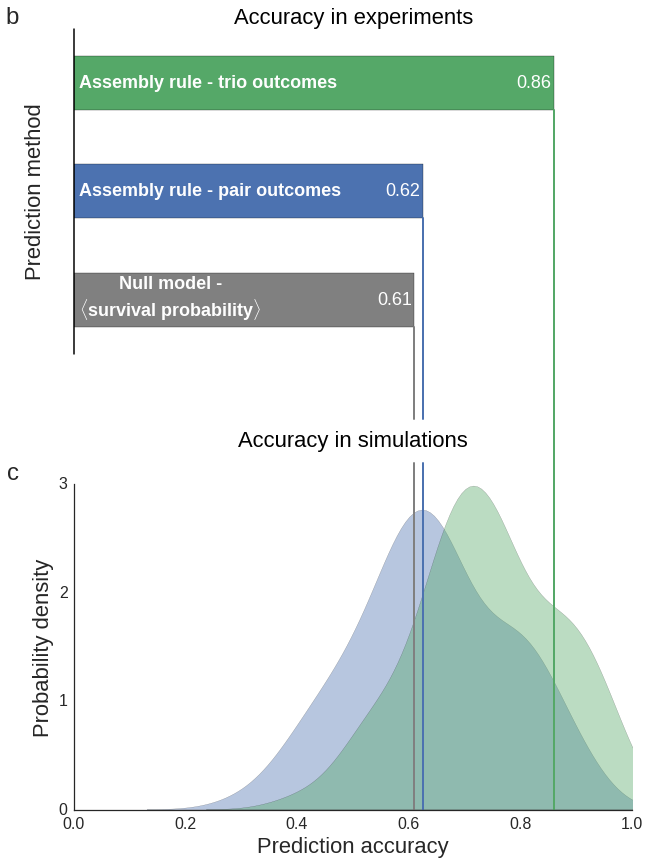

In [230]:
acc = pd.Series([accuracy_all_survive_sep, accuracy_rule_2_sep, accuracy_rule_3_sep])

sns.set_style('white')
fig, axs = subplots(2, 1, figsize=(10,14), sharex='col')

labels = ['majority', 'rule2', 'rule3']
acolors = [acc_colors[l] for l in labels]

ax = axs[0]
acc.plot(kind='barh', color=acolors, ax=ax)

# ax.barh([0, .3], acc, height=.2, color=colors[:2])
ax.set_ylim(-.5,2.5)

ax.set_xlim(0,1)
ax.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax)
ax.set_yticks([])
# ax.set_ylabel('Prediction accuracy\n in experiments', size=20, labelpad=10)
ax.plot([0]*2, (-.5,2.5), '-k', lw=1.5, clip_on=False)

labels = ['Null model -\n$\\langle$survival probability$\\rangle$', 
          'Assembly rule - pair outcomes', 
          'Assembly rule - trio outcomes']

x = 0.01
for i in range(3):
    ax.text(x, i, labels[i], size=18, weight='bold', 
            va='center', ha='left', ma='center', color='w')
    
#     ax.text(0.01, i, labels[i], size=18, weight='bold', 
#             va='center', ha='left', color='w')

    ax.text(acc[i]-.005, i, '%.2f'%acc[i], size=18,
        va='center', ha='right', color='w', zorder=10)


ax.text(.5, 2.6, 'Accuracy in experiments', size=22, 
        va='center', ha='center', ma='center', color='k')


ax.text(.5, -1.3, 'Accuracy in simulations', size=22, clip_on=False,
        va='center', ha='center', ma='center', color='k')

ax.set_yticks([0,1])
ax.set_yticklabels([10,11], color='w')
setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('Prediction method', size=22)


ax=axs[1]

nmax=100

a = .4
# sns.kdeplot(1-err_all_survive[:nmax], shade=True, lw=0, ax=ax, color=colors[0], alpha=a)
sns.kdeplot(1-err2[:nmax], shade=True, lw=0, ax=ax, color=acolors[1], alpha=a)
sns.kdeplot(1-err3[:nmax], shade=True, lw=0, ax=ax, color=acolors[2], alpha=a)

ax.plot([accuracy_all_survive_sep]*2, (0,3.2), '-', lw=2,c=acolors[0], clip_on=False)
ax.plot([accuracy_all_survive_sep]*2, (3.6,4.45), '-', lw=2,c=acolors[0], clip_on=False)
ax.plot([accuracy_rule_2_sep]*2, (0,3.2), '-', lw=2, c=acolors[1], clip_on=False)
ax.plot([accuracy_rule_2_sep]*2, (3.6, 5.45), '-', lw=2, c=acolors[1], clip_on=False)
ax.plot([accuracy_rule_3_sep]*2, (0, 6.45), '-', lw=2,c=acolors[2], clip_on=False)

ax.set_xticks(arange(0, 1.1, .2))
# ax.set_xticklabels(arange(.5, 1, .1))
ytcks = ax.set_yticks([0, 1, 2, 3])
setp(ax.get_xticklabels(), fontsize=16)
setp(ax.get_yticklabels(), fontsize=16)

# ax.set_ylabel('# occurrences', size=20)
ax.set_xlabel('Accuracy', size=20)
ax.set_xlim(0,1)
ax.set_ylim(0,3)

ax.set_ylabel('Probability density', size=22)
ax.set_xlabel('Prediction accuracy', size=22)

subplots_adjust(hspace=.4)

sns.despine(ax=ax, )


ax = axs[0] 
ax.text(-.1, 1., 'b', size=24, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax = axs[1] 
ax.text(-.1, 1, 'c', size=24, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

savefig(fig_out_path + 'Fig_5.panels_bc.pdf', dpi=300, bbox_inches='tight')

## 7|8 species outcomes

In [6]:
filepath = '2016-02-03.EXP_41-competitions_with_new_Pa'
survival_obs = pd.DataFrame.from_csv(filepath + 'multispecies_outcomes.observed.csv')
survival_pred_pairs = pd.DataFrame.from_csv(filepath + 'multispecies_outcomes.prediction_pairs.csv')
survival_pred_trios = pd.DataFrame.from_csv(filepath + 'multispecies_outcomes.prediction_trios.csv')
survival_major = pd.DataFrame.from_csv(filepath + 'multispecies_outcomes.prediction_majoirty.csv')

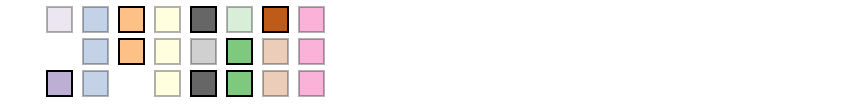

In [53]:
import matplotlib.gridspec as gridspec

def plot_presence(presence, rec_colors, ax=None, ms=25, l=10, s=.9, exclude=[]):
    '''
    presence : iterable of booleans
    '''
    if ax is None:
        fig, ax = subplots(figsize=(l,1))
    
    n = len(presence)
    w = 1./l*(ms/50.)

    for i in range(n):
        c = rec_colors[i]
        x = s*w*i + w/2
        a = 1 if presence[i] else .3
        mew = 2 if presence[i] else 2        
        if isnan(presence[i]) or i in exclude:
            continue
            ax.plot(x, 0, 'x', ms=ms, clip_on=False, 
                   mec='k', mfc=c, mew=mew)
        else:
            ax.plot(x, 0, 's', ms=ms, clip_on=False, 
                   mec='k', mfc=c, mew=mew, alpha=a)

    #         ax.scatter(x, 0, marker='s', s=ms**2, clip_on=False, hatch=hatch, 
    #                    c=c, alpha=a)

            if isnan(presence[i]) or i in exclude:
                ax.plot(x, 0, 'x', ms=ms, clip_on=False, 
                   c='k', mew=3)
    
#     for i in range(8):
#         c = rec_colors[i] if presence[i] else 'w'
        
#         x = space/2 +i*(width+space)
#         rec = mpl.patches.Rectangle((x,0), width, width*2,  fc=c, ec=rec_colors[i], lw=3, clip_on=False)
#                                     #transform=ax.transAxes)
#         ax.add_patch(rec)

    ax.set_xlim(0,1)
#     ax.set_ylim(0, width)
    ax.set_axis_off()
    return ax


fig, axs = subplots(3,1, figsize=(12,1.5))

plot_presence(survival_obs['All'].values, species_colors, ax=axs[0])
plot_presence(survival_pred_pairs[u'$\Delta_{Ea}$'].values, species_colors, ax=axs[1])
plot_presence(survival_obs[u'$\Delta_{Pch}$'].values, species_colors, ax=axs[2], exclude=[2])

tight_layout()

savefig('tmp.png')

# ax = axs[0]
# ax.text(.2, -10, 'a', ha='right', va='bottom', transform=ax.transAxes, fontsize=28)

# yl = ax.get_ylim()

# ax.plot([-.3, 0], [-2]*2, 'k', clip_on=False)

# ax.set_ylim(yl)

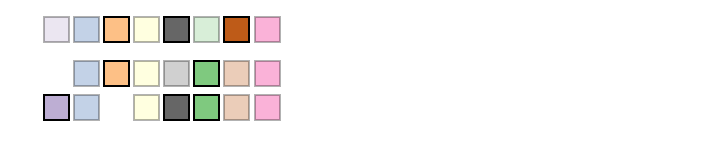

In [5]:
def do_stuff(cell): #just so the plots show up
    ax = plt.subplot(cell)
    ax.plot()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


fig = plt.figure(figsize=(12, 2))

outer = gridspec.GridSpec(2, 1, height_ratios = [1, 2]) 

gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])
gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[1], hspace = .0)


axs = [subplot(gs1[0]), subplot(gs2[0]), subplot(gs2[1])]
            
plot_presence(survival_obs['All'].values, species_colors, ax=axs[0])
plot_presence(survival_pred_pairs[u'$\Delta_{Ea}$'].values, species_colors, ax=axs[1])
plot_presence(survival_obs[u'$\Delta_{Pch}$'].values, species_colors, ax=axs[2], exclude=[2])


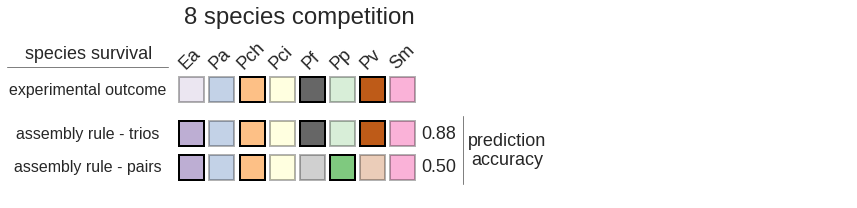

In [6]:
# fig, axs = subplots(3,1, figsize=(11,1.5))

fig = plt.figure(figsize=(12, 2))

outer = gridspec.GridSpec(2, 1, height_ratios = [1, 2]) 

gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])
gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[1], hspace = .0)

axs = [subplot(gs1[0]), subplot(gs2[0]), subplot(gs2[1])]

plot_presence(survival_obs['All'].values, species_colors, ax=axs[0])
plot_presence(survival_pred_trios['All'].values, species_colors, ax=axs[1])
plot_presence(survival_pred_pairs['All'].values, species_colors, ax=axs[2])

# tight_layout()

for ax, data in zip(axs[1:], [survival_pred_trios, survival_pred_pairs]):
    accuracy = (data.iloc[:,0]==survival_obs.iloc[:,0]).sum()/8.
    ax.text(.37, .5, r'%.2f'%accuracy, ha='left', va='center', 
            transform=ax.transAxes, fontsize=18) 

xloc = -.13
axs[0].text(xloc, .5, 'experimental outcome', ha='center', va='center', transform=axs[0].transAxes, fontsize=16)
axs[1].text(xloc, .5, 'assembly rule - trios', ha='center', va='center', transform=axs[1].transAxes, fontsize=16)
axs[2].text(xloc, .5, 'assembly rule - pairs', ha='center', va='center', transform=axs[2].transAxes, fontsize=16)

axs[0].text(.185, 2.3, '8 species competition', ha='center', va='bottom', 
            transform=axs[0].transAxes, fontsize=24) 

ax = axs[0]
ms=25; l=10; s=.9
w = 1./l*(ms/50.)
for i, sp in enumerate(species):
    x = s*w*i + w/2
    y = 3.7 + .4*(i%2)
    y = 3.3
    ax.text(x, y, sp, ha='center', va='bottom', rotation=45,
            transform=axs[-1].transAxes, fontsize=18)

ax = axs[0]
yl = ax.get_ylim()
ax.plot([-.25, -.01], [.08]*2, 'gray', clip_on=False, lw=1)
axs[0].text(xloc, 1.3, 'species survival', ha='center', va='bottom', transform=axs[0].transAxes, fontsize=18)
ax.set_ylim(yl)

ax = axs[1]
l = mpl.lines.Line2D((.43,.43),(0,2),transform=axs[-1].transAxes, color='gray', lw=1)
fig.lines.append(l)
axs[-1].text(.44, 1, 'prediction\naccuracy', ha='left', va='center', ma='center',
             transform=axs[-1].transAxes, fontsize=18)


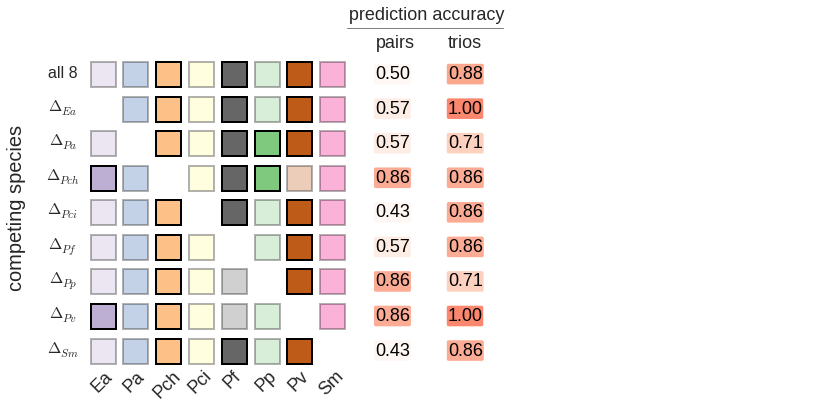

In [7]:
n = 9
w = .5
fig, axs = subplots(n,1, figsize=(11,n*.5))

cmap = cm.Reds
cmap = cm.ScalarMappable(Normalize(vmax=1.5, vmin=.5), cm.Reds).to_rgba

xloc = -.03
row_labels = ['all 8 species'] + ['all but '+s for s in species]
row_labels = ['all 8'] + list(survival_obs.columns[1:])
for i, ax in enumerate(axs):
    plot_presence(survival_obs.iloc[:,i].values, species_colors, ax=ax)
    ax.text(xloc, 1.5, row_labels[i], ha='center', va='center', transform=ax.transAxes, fontsize=16)
    
    n = 7. if i else 8.
    acc2 = (survival_pred_pairs.iloc[:,i]==survival_obs.iloc[:,i]).sum()/n
    acc3 = (survival_pred_trios.iloc[:,i]==survival_obs.iloc[:,i]).sum()/n
    
    
    for j,acc in enumerate([acc2, acc3]):
        x = .4 + .1*j
        bbox=dict(facecolor=cmap(acc), alpha=.8, lw=0, boxstyle='round,pad=.1')
        ax.text(x, .5, r'%.2f'%acc, ha='left', va='center', color='k',
            transform=ax.transAxes, fontsize=18, bbox=bbox) 
    
    
tight_layout()


ax = axs[4]
yl = ax.get_ylim()
# ax.plot([-.15, -.01], [2]*2, 'gray', clip_on=False, lw=1)
ax.text(-.08, .5, 'competing species', ha='right', va='center', fontsize=20, rotation=90)

ax= axs[0]
ax.plot([.36, .575], [5]*2, 'gray', clip_on=False, lw=1)
ax.text(.47, 5.5, 'prediction accuracy', ha='center', va='bottom', fontsize=18)
ax.text(.427, 2.5, 'pairs', ha='center', va='bottom', fontsize=18)
ax.text(.522, 2.5, 'trios', ha='center', va='bottom', fontsize=18)

ax.set_ylim(yl)

ax = axs[-1]
ms=25; l=10; s=.9
w = 1./l*(ms/50.)
for i, sp in enumerate(species):
    x = s*w*i + w/2
    y = 3.7 + .4*(i%2)
    y = -16
    ax.text(x, y, sp, ha='center', va='top', rotation=45,
            transform=axs[-1].transAxes, fontsize=18)
    
# savefig(fig_out_path + 'septets_outcomes.png', dpi=300, bbox_inches='tight')

In [93]:
survival_pred_trios

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,1,NaN,1,1,1,1,1,1,1
Pa,0,0,NaN,0,0,0,0,0,0
Pch,1,1,1,NaN,1,1,1,1,1
Pci,0,0,0,1,NaN,0,0,0,0
Pf,1,1,1,1,1,NaN,1,0,1
Pp,0,0,0,1,0,0,NaN,0,0
Pv,1,1,1,0,1,1,1,NaN,1
Sm,0,0,0,0,0,0,0,0,NaN


###  Revision

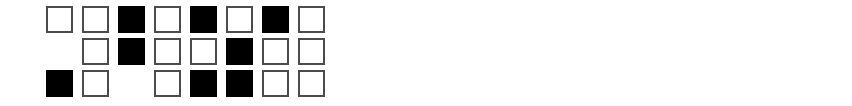

In [7]:
import matplotlib.gridspec as gridspec

def plot_presence(presence, ax=None, ms=25, l=10, s=.9, exclude=[]):
    '''
    presence : iterable of booleans
    '''
    if ax is None:
        fig, ax = subplots(figsize=(l,1))
    
    n = len(presence)
    w = 1./l*(ms/50.)

    for i in range(n):
        c = 'k' if presence[i] else 'w' 
        x = s*w*i + w/2
        a = 1 if presence[i] else .7
        mew = 2 if presence[i] else 2        
        if isnan(presence[i]) or i in exclude:
            continue
            ax.plot(x, 0, 'x', ms=ms, clip_on=False, 
                   mec='k', mfc=c, mew=mew)
        else:
            ax.plot(x, 0, 's', ms=ms, clip_on=False, 
                   mec='k', mfc=c, mew=mew, alpha=a)

    #         ax.scatter(x, 0, marker='s', s=ms**2, clip_on=False, hatch=hatch, 
    #                    c=c, alpha=a)

            if isnan(presence[i]) or i in exclude:
                ax.plot(x, 0, 'x', ms=ms, clip_on=False, 
                   c='k', mew=3)
    
#     for i in range(8):
#         c = rec_colors[i] if presence[i] else 'w'
        
#         x = space/2 +i*(width+space)
#         rec = mpl.patches.Rectangle((x,0), width, width*2,  fc=c, ec=rec_colors[i], lw=3, clip_on=False)
#                                     #transform=ax.transAxes)
#         ax.add_patch(rec)

    ax.set_xlim(0,1)
#     ax.set_ylim(0, width)
    ax.set_axis_off()
    return ax


fig, axs = subplots(3,1, figsize=(12,1.5))

plot_presence(survival_obs['All'].values, ax=axs[0])
plot_presence(survival_pred_pairs[u'$\Delta_{Ea}$'].values, ax=axs[1])
plot_presence(survival_obs[u'$\Delta_{Pch}$'].values, ax=axs[2], exclude=[2])

tight_layout()


# ax = axs[0]
# ax.text(.2, -10, 'a', ha='right', va='bottom', transform=ax.transAxes, fontsize=28)

# yl = ax.get_ylim()

# ax.plot([-.3, 0], [-2]*2, 'k', clip_on=False)

# ax.set_ylim(yl)

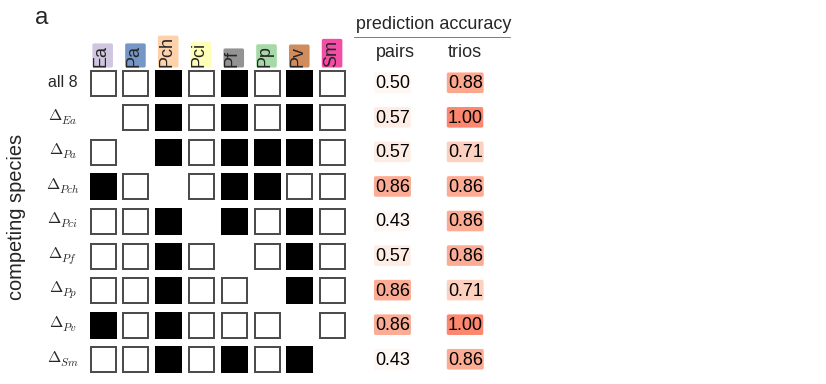

In [242]:
n = 9
w = .5
fig, axs = subplots(n,1, figsize=(11,n*.5))

cmap = cm.Reds
cmap = cm.ScalarMappable(Normalize(vmax=1.5, vmin=.5), cm.Reds).to_rgba

xloc = -.03
row_labels = ['all 8 species'] + ['all but '+s for s in species]
row_labels = ['all 8'] + list(survival_obs.columns[1:])
for i, ax in enumerate(axs):
    plot_presence(survival_obs.iloc[:,i].values, ax=ax)
    ax.text(xloc, 1.5, row_labels[i], ha='center', va='center', transform=ax.transAxes, fontsize=16)
    
    n = 7. if i else 8.
    acc2 = (survival_pred_pairs.iloc[:,i]==survival_obs.iloc[:,i]).sum()/n
    acc3 = (survival_pred_trios.iloc[:,i]==survival_obs.iloc[:,i]).sum()/n
    
    
    for j,acc in enumerate([acc2, acc3]):
        x = .4 + .1*j
        bbox=dict(facecolor=cmap(acc), alpha=.8, lw=0, boxstyle='round,pad=.1')
        ax.text(x, .5, r'%.2f'%acc, ha='left', va='center', color='k',
            transform=ax.transAxes, fontsize=18, bbox=bbox) 
    
    
tight_layout()


ax = axs[4]
yl = ax.get_ylim()
# ax.plot([-.15, -.01], [2]*2, 'gray', clip_on=False, lw=1)
ax.text(-.08, .5, 'competing species', ha='right', va='center', fontsize=20, rotation=90)

## add accuracy labels
ax= axs[0]
ax.plot([.37, .585], [5]*2, 'gray', clip_on=False, lw=1)
ax.text(.48, 5.5, 'prediction accuracy', ha='center', va='bottom', fontsize=18)
ax.text(.427, 2.5, 'pairs', ha='center', va='bottom', fontsize=18)
ax.text(.522, 2.5, 'trios', ha='center', va='bottom', fontsize=18)

ax.set_ylim(yl)

## label columns
ax = axs[0]
ms=25; l=10; s=.9
w = 1./l*(ms/50.)
for i, sp in enumerate(species):
    x = s*w*i + w/2
    y = 3.7 + .4*(i%2)
    y = 16
    ax.text(x, y, sp, ha='center', va='bottom', rotation=90,
            transform=axs[0].transAxes, fontsize=18, 
            bbox=dict(facecolor=species_colors[i], alpha=0.7, lw=0, boxstyle='round,pad=.1'))
    

ax = axs[0] 
ax.text(-.05, 50, 'a', size=24, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

savefig(fig_out_path + 'Fig_5.panel_a.pdf', dpi=300, bbox_inches='tight')

# Supplement

In [3]:
fig_out_path_sup = '../manuscript/figures/supplement/'

## growth rate vs competitive score

In [147]:
param_file = '2015-01-01.EXP_25-Pairwise_competition/params_lv_rows.txt'
params_lv = pd.read_csv(param_file, index_col=0)

param_file = '2015-01-01.EXP_25-Pairwise_competition/gamma_avg.txt'
gamma_avg_all = pd.read_csv(param_file, index_col=0)
gamma_avg = gamma_avg_all.iloc[:,3] #initial density similar to experimental one
gamma_avg.index=species

single_fits_params = pd.read_csv('sim/single_species_fits_params.csv', index_col=0)

In [149]:
def get_survival(x):
    a = (x==x.name)
    b = (x=='COX')
    return (a | b).sum() - 1

survival = outcomes.apply(get_survival)/7.

def get_score(x, n=7, scores=array([1, 0, -1])):
    a = (x==x.name).sum() - 1
    b = (x=='COX').sum()
    c = 7-a-b
    score = (array([a,b,c])*scores).sum()
    return score

score = outcomes.apply(get_score)/7.
# plot(survival, score, 'o', ms=10)

In [163]:
## organize results of all pairs according to difference in growth rate
r = gamma_avg
# r = single_fits_params['r']
# r = params_lv['r']

r.index = species

outcomes_by_growth_rate_diff = pd.DataFrame(zeros((28,4)), columns=['s1', 's2', 'dr', 'outcome'])
for i,pair in enumerate(combinations(species,2)):
    s1,s2 = pair
    r1, r2 = r[s1], r[s2]
    dr = abs(r1-r2)
    o = outcomes.loc[s1,s2]
    if o=='COX':
        oo = 'cox'
    else:
        faster = s1 if r1>r2 else s2
        oo = 'faster' if o==faster else 'slower'
    outcomes_by_growth_rate_diff.iloc[i] = [s1,s2,dr, oo]
    
## organize results of all pairs according to difference in growth rate   
drs = linspace(0,.5, 51)
n = len(drs)
outcome_n_by_dr = pd.DataFrame(zeros((n,3)), columns=['faster', 'cox', 'slower'])
for i,dr in enumerate(drs):
    os = outcomes_by_growth_rate_diff[outcomes_by_growth_rate_diff['dr']>dr]
    outcome_n_by_dr.iloc[i] = os.outcome.value_counts()

outcome_n_by_dr.fillna(0, inplace=True)
outcome_f_by_dr = outcome_n_by_dr.apply(lambda x:x/x.sum(), axis=1)

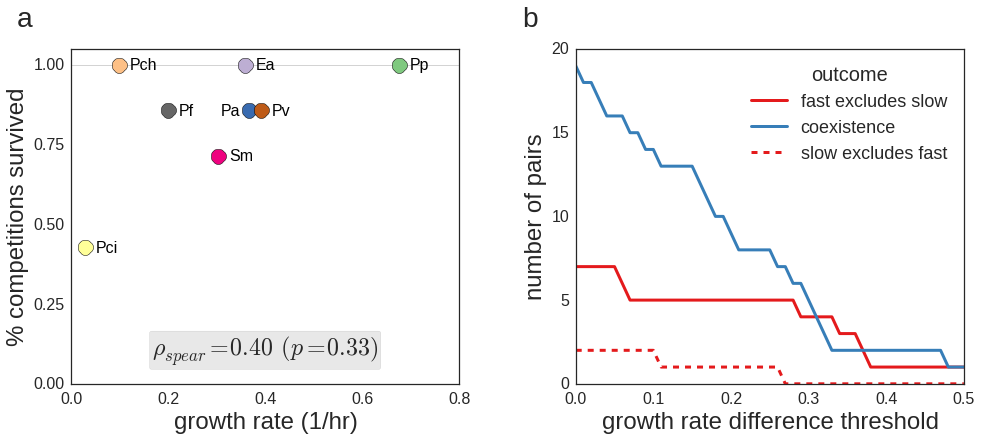

In [164]:
x = r
y = survival
# y = score

cor = stats.spearmanr(x,y)

fig, axs = subplots(1, 2, figsize=(16,6))

ax = axs[0]
for i,c in enumerate(species_colors):
    xi, yi = x[i], y[i]
    ax.plot(xi, yi, 'o', mfc=c, mew=.5, ms=15, mec='k')
#     ax.annotate(species[i], (xi,yi),
#             ha='center', va='bottom',
#             xytext=(0,10), textcoords='offset points',
#             family='sans-serif', fontsize=16, color='k')
    
    s = species[i]
    if s=='Pa':
        xoff = -9
        ha = 'right'
    else:
        xoff = 12
        ha='left'
    ax.annotate(s, (xi,yi),
            ha=ha, va='center',
            xytext=(xoff,0), textcoords='offset points',
            family='sans-serif', fontsize=16, color='k')
    
ax.set_xlim(0, .8)
ax.set_ylim(0, 1.05)

ax.text(0.5, 0.05, r'$\rho_{spear} = %.2f \,(p=%.2f)$'%(cor.correlation, cor.pvalue),
         ha='center', va='bottom', size=24, transform=ax.transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, lw=0.1, boxstyle='round,pad=.1'))
    
xtcks = arange(0,.81,.2)
ytcks = [0, .25, .5, .75, 1]
ax.set_xticks(xtcks)
ax.set_yticks(ytcks)

setp(ax.get_xticklabels() + ax.get_yticklabels(), size=16)

# ax.set_xlabel('growth rate (hr$^{-1}$)', size=24)
ax.set_xlabel('growth rate (1/hr)', size=24)
ax.set_ylabel('% competitions survived', size=24)
# ax.set_ylabel('competitive score', size=24)

ax.plot(ax.get_xlim(), [1,1], lw=1, color='lightgray', zorder=-10)


ax = axs[1]
cs = ['#e41a1c', '#377eb8', '#e41a1c']
os = ['faster', 'cox', 'slower']
lss = ['-', '-', '--']
for o,c,ls in zip(os, cs, lss):
    outcome_n_by_dr[o].plot(ax=ax, lw=3, color=c, ls=ls, legend=False)
xtcks = arange(0,n,10)
ax.set_xticks(xtcks)
ax.set_xticklabels(drs[xtcks], size=16)
leg = ax.legend(['fast excludes slow', 'coexistence', 'slow excludes fast'], 
                loc='best', fontsize=18, title='outcome')
leg.get_title().set_size(20)

setp(ax.get_yticklabels(), size=16)

ax.set_xlabel('growth rate difference threshold', size=24)
ax.set_ylabel('number of pairs', size=24)

subplots_adjust(wspace=.3)

for ax, l in zip(axs, ['a', 'b']):
    ax.text(-.1, 1.05, l, size=28, clip_on=False, transform=ax.transAxes,
           ha='right', va='bottom')
    
    
savefig(fig_out_path + 'FigS2/final.2016-07-27.png', dpi=300, bbox_inches='tight')

## Inconsistent outcomes

In [24]:
fracs = pd.read_csv('2015-12-16.EXP_38-bistable_pairs/fracs_all.csv', index_col=[0,1,2,3])

xls_file = '../data/colony_counts/2015-12-16.EXP_38.counts.xlsx'
xls = pd.ExcelFile(xls_file)

times =  [0, 5]
all_counts = {}
counts_d = {}

for t in times:
    tmp = xls.parse('EaPv_T%d'%t, na_values=['na'], parse_cols=9).fillna(0)
    ind = tmp.applymap(lambda x:x=='na')
    tmp[ind] = nan
    counts_d[t] = tmp.set_index(['Row', 'Col'])
all_counts = pd.Panel(counts_d)
# all_counts.set_index(['Plate', 'Row', 'Col'])
Ea_Pv_counts = all_counts.transpose(2,0,1).to_frame().sort_index()

def norm_fun(x):
    if x.sum()==0:
        return 0*x
    else:
        return 1.*x/x.sum()

Ea_Pv_fracs = Ea_Pv_counts.apply(norm_fun, axis=1 )

f = Ea_Pv_fracs.unstack('Col')

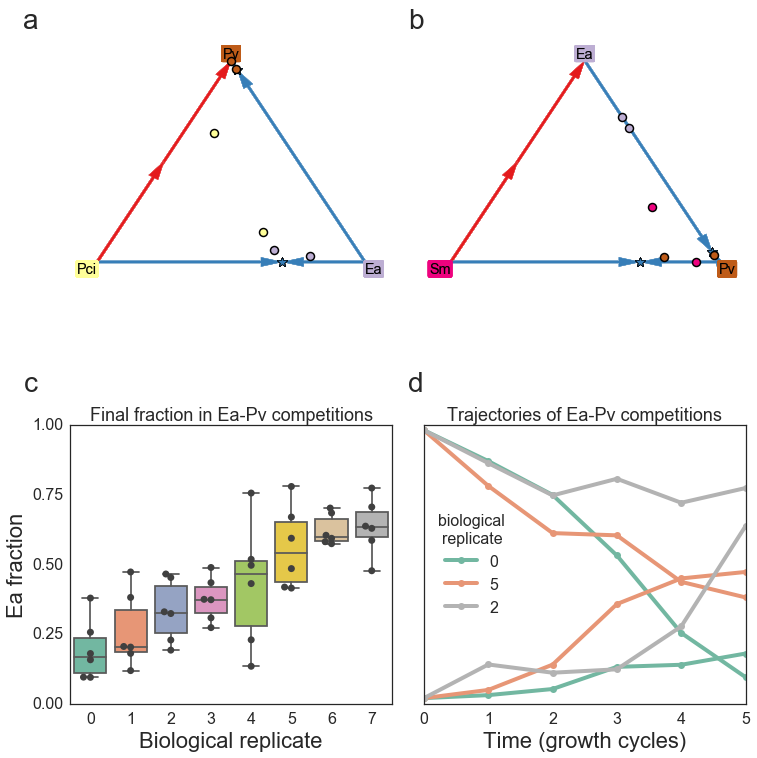

In [170]:
to_plot = [
(['Pci', 'Ea', 'Pv'], 0),
(['Sm', 'Pv', 'Ea'], 1),
]

c = 'darkgray'
c_end = 'k'

w = 6
wspace = .1
hspace = .5
fig, axs = subplots(2, 2, figsize=(2*w+wspace, 2*w+hspace)) 



for k,(sps,i) in enumerate(to_plot):
    ax = axs[0, k]
    
    cs = [species_colors_d[sp] for sp in  list(trios[i])]
    tmp = outcomes.reindex(sps,sps)
    net = make_interaction_network(tmp, pair_frac_avg_34)

    for rep in ['A', 'B']:
        trio_fracs, trio_counts = get_trio_data(i, rep)
        tp = TernPloter(ax=ax, species_colors=species_colors_d, net=net, style='new')
        tp.plot_net_boundry(sps)
        for j in range(3):
            c = cs[j]
            tp.plot(trio_fracs.loc[[5],j, sps].T, lw=.1, mec=c_end, mew=1.5,
                    marker='o', ms=8, alpha=1, color=c, plot_func='plot', zorder=10)
            tp.plot(trio_fracs.loc[:,j, sps].T, color=c, plot_func='arrow_path', 
                    lw=1.5, fs=[0.05, .6], zorder=5)

############
ax = axs[1,0] 
data = f.loc[5]['Ea'].T
order = list(data.median().sort_values().index)

sns.swarmplot(data=data[order], ax=ax, color=".25", size=7)
# sns.stripplot(data=data[order], ax=ax, size=10, jitter=True, color=".25")
sns.boxplot(data=data[order], ax=ax, palette="Set2")
ax.set_xlabel('Biological replicate', size=22)
ax.set_ylabel('Ea fraction', size=22)
ax.set_yticks([0, .25, .5, .75, 1])
_ = ax.set_xticklabels(range(8))

_ = setp(ax.get_xticklabels() + ax.get_yticklabels(), size=16)

artists = ax.artists

ax.set_title('Final fraction in Ea-Pv competitions', size=18)

############
ax = axs[1,1]            
rows = ['H', 'A', 'D']

inds = [order.index(r) for r in rows]
cs = [artists[i].get_facecolor() for i in inds ]
 
for i,r in enumerate(rows):
    f1 = fracs.loc[(slice(None),1, r, 1), 'Ea']
    f2 = fracs.loc[(slice(None),1, r, 6), 'Ea']
    ax.plot(f1.values, '-o', lw=4, color=cs[i])
    ax.plot(f2.values, '-o', lw=4, color=cs[i])
    
# ax.set_ylabel('Ea fraction', size=22)
xlbl = ax.set_xlabel('Time (growth cycles)', size=22, va='top')

leg = ax.legend( ax.lines[::2], [0, 5, 2], loc='best', fontsize=16, title='biological\nreplicate')
t = leg.get_title()
t.set_size(16)
t.set_multialignment('center')

ax.set_yticks([])
_ = setp(ax.get_xticklabels() + ax.get_yticklabels(), size=16)

ax.set_title('Trajectories of Ea-Pv competitions', size=18)

subplots_adjust(wspace=wspace, hspace=hspace)


ax = axs[0,0] 
ax.text(-.1, .9, 'a', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax = axs[0,1] 
ax.text(0, .9, 'b', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax = axs[1,0] 
ax.text(-.1, 1.1, 'c', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax = axs[1,1] 
ax.text(0, 1.1, 'd', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

savefig(fig_out_path + 'FigS3/final.2016-07-27.png', dpi=300, bbox_inches='tight')

## Interference & facilitation

In [29]:
ofile = '2016-01-24.EXP_41.filtered_media/ods_48.csv'
od_48_filtrate = pd.read_csv(ofile, index_col=0)

ry_filtrate = ((od_48_filtrate - diag(od_48_filtrate))/(od_48_filtrate  + diag(od_48_filtrate))).T

ofile = '2015-05-21.EXP_34-Trio_competition/pair_ry.dos.median.final.csv'
ry_competition = pd.read_csv(ofile, index_col=0)

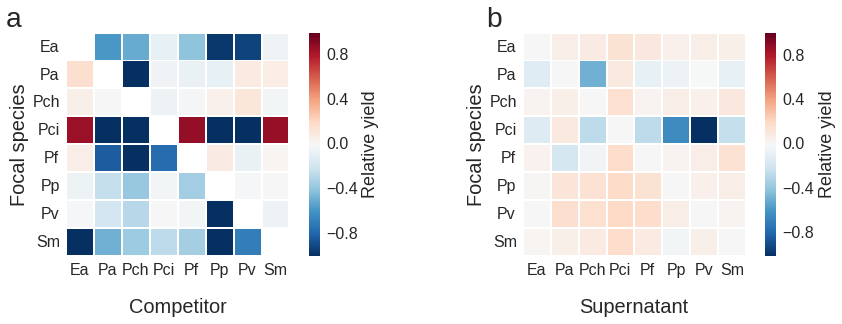

In [76]:
fig, axs = subplots(1,2, figsize=(15, 4))


datas = [ry_competition, ry_filtrate]
xlabels = ['Competitor', 'Supernatant']
cblabels = [r'$\frac{OD_{\mathregular{in \, coculture}} - OD_{\mathregular{in \, monoculture}}}{OD_{\mathregular{in \, coculture}} + OD_{\mathregular{in \, monoculture}}}$', 
           r'$\frac{OD_{\mathregular{other \, supernatant}} - OD_{\mathregular{self \, supernatant}}}{OD_{\mathregular{other \, supernatant}} + OD_{\mathregular{self \, supernatant}}}$']

cblabels = ['Relative yield']*2

for ax, data, xlbl, cblbl in zip(axs,datas,xlabels, cblabels):
    ax = sns.heatmap(data, linewidths=.5, square=True, ax=ax)
    ax.tick_params(labelsize=16)
    ax.set_ylabel('Focal species', size=20)
    ax.set_xlabel(xlbl, size=20, labelpad=20)
    setp(ax.get_yticklabels(), rotation=0)

    cbar = ax.collections[0].colorbar
    cbar.set_label(cblbl, size=18)
    # cbar.set_label(r'$ \frac{OD_{other}}{OD_{self}}$', size=22)
    # tcks = array([-2, -1, 0, 1, 2])
    # tck_lbls  = [r'$2^{%d}$'%t for t in tcks]
    # cbar.set_ticks(tcks)
    # cbar.set_ticklabels(tck_lbls)
    cbar.ax.tick_params(labelsize=16)

ax = axs[0] 
ax.text(-.2, 1., 'a', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax = axs[1] 
ax.text(-.1, 1, 'b', size=28, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

savefig(fig_out_path + 'FigS4/panels.2016-07-28.png', dpi=300, bbox_inches='tight')

## LV fits 

### prediction accuracy 

In [322]:
accuracy_glv_trios = 0.84
accuracy_glv_septats = .625

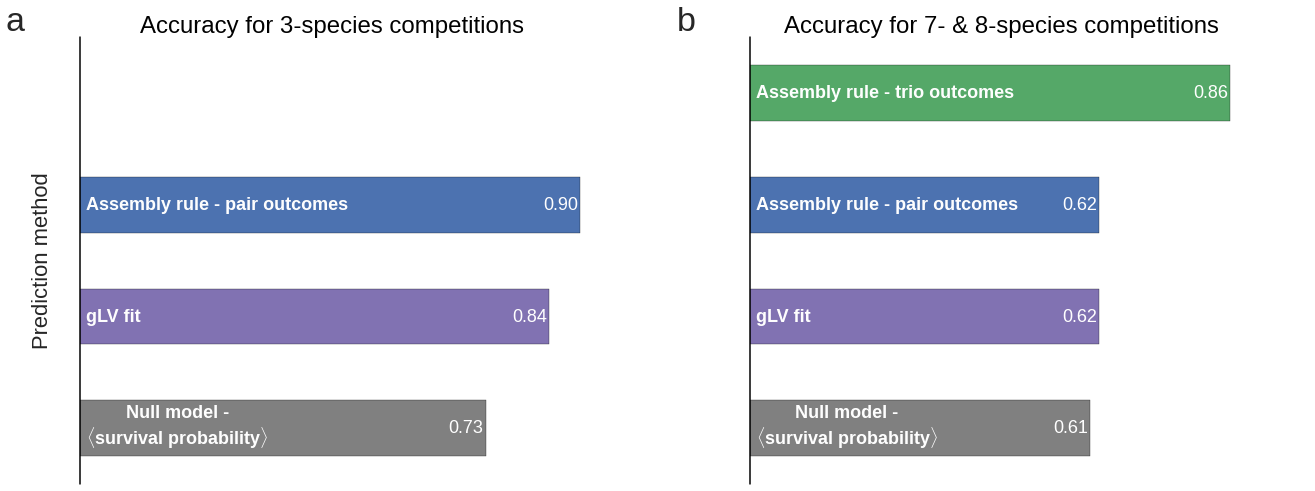

In [409]:
acc = pd.Series([accuracy_all_survive_trios, accuracy_glv_trios, accuracy_rule_trios])

labels = ['majority', 'gLV', 'rule2', ]
acolors = [acc_colors[l] for l in labels]

sns.set_style('white')
fig, axs = subplots(1, 2, figsize=(22,8), sharex='col')
# fig, axs = subplots(2, 1, figsize=(10,16), sharex='col', gridspec_kw={'height_ratios':[3,4]})

ax = axs[0]
acc.plot(kind='barh', color=acolors, ax=ax)

ax.set_ylim(-.5,3.5)
# ax.set_ylim(-.75, 1.75)
ax.set_xlim(0.,1)
ax.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax)
ax.set_yticks([])

xmin = 0
ax.plot([xmin]*2, (-.5,3.5), '-k', lw=1.5, clip_on=False)



labels = ['Null model -\n$\\langle$survival probability$\\rangle$', 
          'gLV fit', 
          'Assembly rule - pair outcomes']

x = xmin+0.01
for i in range(3):
    ax.text(x, i, labels[i], size=18, weight='bold', 
            va='center', ha='left', ma='center', color='w')

    ax.text(acc[i]-.005, i, '%.2f'%acc[i], size=18,
        va='center', ha='right', color='w', zorder=10)


ax.text(.45, 3.6, 'Accuracy for 3-species competitions', size=24, 
        va='center', ha='center', ma='center', color='k')


ax.set_yticks([0,1])
ax.set_yticklabels([10,11], color='w')
setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('Prediction method', size=22)


##########################
ax = axs[1]
acc = pd.Series([accuracy_all_survive_sep, accuracy_glv_septats, accuracy_rule_2_sep, accuracy_rule_3_sep])

labels = ['majority', 'gLV', 'rule2', 'rule3']
acolors = [acc_colors[l] for l in labels]

acc.plot(kind='barh', color=acolors, ax=ax)

ax.set_ylim(-.5,3.5)

ax.set_xlim(0,1)
ax.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax)
ax.set_yticks([])
# ax.set_ylabel('Prediction accuracy\n in experiments', size=20, labelpad=10)
ax.plot([0]*2, (-.5,3.5), '-k', lw=1.5, clip_on=False)

labels = ['Null model -\n$\\langle$survival probability$\\rangle$',
          'gLV fit', 
          'Assembly rule - pair outcomes', 
          'Assembly rule - trio outcomes']

x = 0.01
for i in range(4):
    ax.text(x, i, labels[i], size=18, weight='bold', 
            va='center', ha='left', ma='center', color='w')
    
#     ax.text(0.01, i, labels[i], size=18, weight='bold', 
#             va='center', ha='left', color='w')

    ax.text(acc[i]-.005, i, '%.2f'%acc[i], size=18,
        va='center', ha='right', color='w', zorder=10)


ax.text(.45, 3.6, 'Accuracy for 7- & 8-species competitions', size=24, 
        va='center', ha='center', ma='center', color='k')


ax.set_yticks([0,1])
ax.set_yticklabels([10,11], color='w')


ax = axs[0] 
ax.text(-.1, 1., 'a', size=34, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

ax = axs[1] 
ax.text(-.1, 1, 'b', size=34, clip_on=False, transform=ax.transAxes,
       ha='right', va='bottom')

savefig(fig_out_path + 'FigS5/final.2016-07-28.png', dpi=300, bbox_inches='tight')

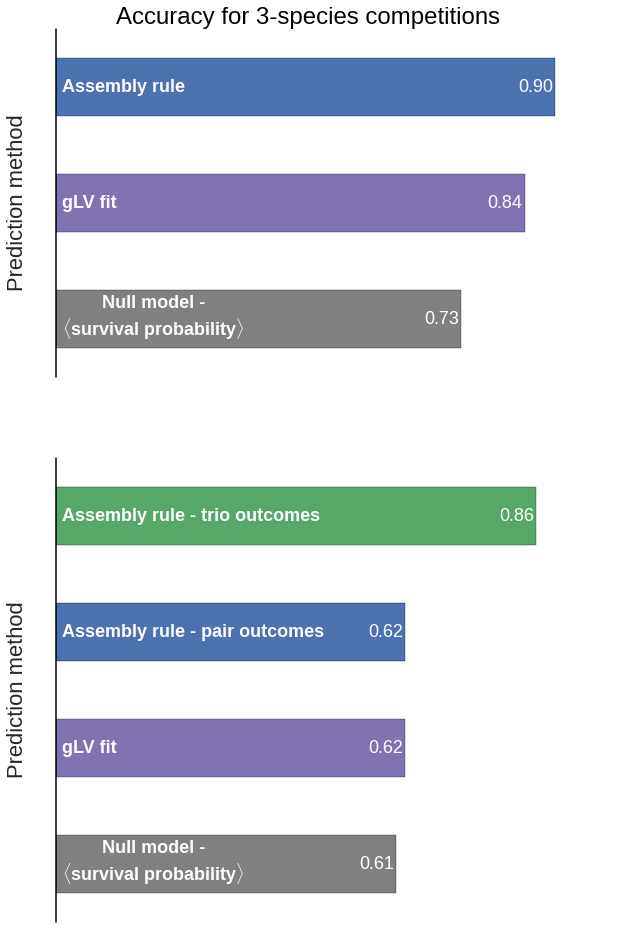

In [356]:
acc = pd.Series([accuracy_all_survive_trios, accuracy_glv_trios, accuracy_rule_trios])

labels = ['majority', 'gLV', 'rule2', ]
acolors = [acc_colors[l] for l in labels]

sns.set_style('white')
# fig, axs = subplots(1, 2, figsize=(22,6), sharex='col')
fig, axs = subplots(2, 1, figsize=(10,16), sharex='col', gridspec_kw={'height_ratios':[3,4]})

ax = axs[0]
acc.plot(kind='barh', color=acolors, ax=ax)

ax.set_ylim(-.5,2.5)
# ax.set_ylim(-.75, 1.75)
ax.set_xlim(0.5,1)
ax.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax)
ax.set_yticks([])

xmin = 0
ax.plot([xmin]*2, (-.5,2.5), '-k', lw=1.5, clip_on=False)



labels = ['Null model -\n$\\langle$survival probability$\\rangle$', 
          'gLV fit', 
          'Assembly rule']

x = xmin+0.01
for i in range(3):
    ax.text(x, i, labels[i], size=18, weight='bold', 
            va='center', ha='left', ma='center', color='w')

    ax.text(acc[i]-.005, i, '%.2f'%acc[i], size=18,
        va='center', ha='right', color='w', zorder=10)


ax.text(.45, 2.6, 'Accuracy for 3-species competitions', size=24, 
        va='center', ha='center', ma='center', color='k')


ax.set_yticks([0,1])
ax.set_yticklabels([10,11], color='w')
setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('Prediction method', size=22)


##########################
ax = axs[1]
acc = pd.Series([accuracy_all_survive_sep, accuracy_glv_septats, accuracy_rule_2_sep, accuracy_rule_3_sep])

labels = ['majority', 'gLV', 'rule2', 'rule3']
acolors = [acc_colors[l] for l in labels]

acc.plot(kind='barh', color=acolors, ax=ax)

ax.set_ylim(-.5,3.5)

ax.set_xlim(0,1)
ax.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax)
ax.set_yticks([])
# ax.set_ylabel('Prediction accuracy\n in experiments', size=20, labelpad=10)
ax.plot([0]*2, (-.5,3.5), '-k', lw=1.5, clip_on=False)

labels = ['Null model -\n$\\langle$survival probability$\\rangle$',
          'gLV fit', 
          'Assembly rule - pair outcomes', 
          'Assembly rule - trio outcomes']

x = 0.01
for i in range(4):
    ax.text(x, i, labels[i], size=18, weight='bold', 
            va='center', ha='left', ma='center', color='w')
    
#     ax.text(0.01, i, labels[i], size=18, weight='bold', 
#             va='center', ha='left', color='w')

    ax.text(acc[i]-.005, i, '%.2f'%acc[i], size=18,
        va='center', ha='right', color='w', zorder=10)


# ax.text(.5, 2.6, 'Accuracy in experiments', size=22, 
#         va='center', ha='center', ma='center', color='k')


ax.set_yticks([0,1])
ax.set_yticklabels([10,11], color='w')
setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('Prediction method', size=22)

### Data and funcs

In [4]:
import cPickle as pickle

t_trans = 48
dil = 1500.

## mon cultures od
ods_singles = pd.read_pickle('2015-05-21.EXP_34-Trio_competition/ODs_single_species.pick')

## pair counts
f = open('2015-05-21.EXP_34-Trio_competition/pair_counts_masked.pick','r')
pair_counts_masked_dict = pickle.load(f)
f.close()
pair_counts_masked = {k:pd.Panel4D(v) for k,v in pair_counts_masked_dict.items()}

## pair partial ods
f = open('2015-05-21.EXP_34-Trio_competition/pair_partial_OD.pick','r')
pair_partial_OD_dict = pickle.load(f)
f.close()
pair_partial_OD = {k:pd.Panel4D(v) for k,v in pair_partial_OD_dict.items()}

f = open('2015-05-21.EXP_34-Trio_competition/last_fracs_masked.pick','r')
last_fracs_masked_dict = pickle.load(f)
f.close()
last_fracs_masked = pd.Panel4D(last_fracs_masked_dict)

f = open('2015-05-21.EXP_34-Trio_competition/last_partial_OD.pick','r')
last_partial_OD_dict = pickle.load(f)
f.close()
last_partial_OD = pd.Panel4D(last_partial_OD_dict)

cfile = '2016-02-03.EXP_41-competitions_with_new_Pa/pair_counts.csv'
pair_counts_pa = pd.read_csv(cfile, index_col=[0,1,2,3])

cfile = '2016-02-03.EXP_41-competitions_with_new_Pa/pair_partial_OD.csv'
pair_partial_OD_pa = pd.read_csv(cfile, index_col=[0,1,2,3])
rows = pair_partial_OD_pa.index.levels[2]

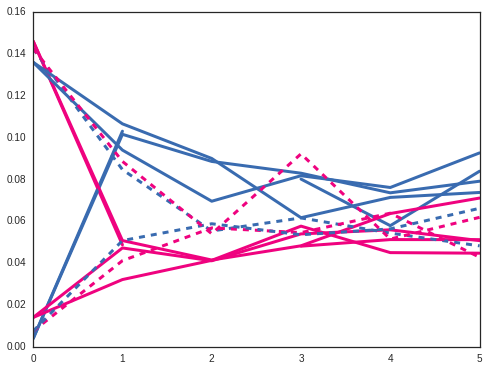

In [54]:
from itertools import permutations, combinations


def get_single_data(i, all_inds=None):
    tmp = array([ods_singles.iloc[i].T.values]).transpose(1,2,0)
    if all_inds is not None:
        n = len(all_inds)
        ind = where(asarray(all_inds)==i)[0][0]
        single_data = zeros((tmp.shape[0], tmp.shape[1], n))
        single_data[:,:,ind] = tmp[:,:,0]
    else:
        single_data = tmp
    return single_data


def get_pair_data(inds, data, all_inds=None,  new_pa=False):
    ''''
    Get the time-series data of a given species pair.
    Data is for 2 initial conditions (95-5 and 5-95). with 2 replicates each.
    
    inds : list (len=2)
        Indices of the desired species.
    data :
        The data from which to extract the desired pair.
        Could be counts or partial OD
    '''
    if all_inds is None:
        all_inds = inds
    
    sps = array([species[i] for i in inds])
    all_sps = array([species[i] for i in all_inds])
    m = len(all_inds)
    if new_pa:
        n = 6
        k = 2
    else:
        n = data[1].shape[0]
        k = 4
   
    pair_data = pd.Panel( full((k, n, m), nan), minor_axis=all_sps)
    
    i,j = inds
    if new_pa:
        sps = [species[i], species[j]]
        row = rows[i if i!=1 else j]
        pair_data.loc[0] = pair_partial_OD_pa.xs((row,1), level=('Row', 'Plate'))[sps].values
        pair_data.loc[1] = pair_partial_OD_pa.xs((row,2), level=('Row', 'Plate'))[sps].values
    else:
        pair_data.loc[0] = data[1].iloc[:,i,j, all_inds].T.values
        pair_data.loc[1] = data[2].iloc[:,i,j, all_inds].T.values
        pair_data.loc[2] = data[1].iloc[:,j,i, all_inds].T.values
        pair_data.loc[3] = data[2].iloc[:,j,i, all_inds].T.values
   
    return pair_data.values




# ys = get_pair_data([1,2], pair_partial_OD, new_pa=False)


fig, ax = subplots(figsize=(8,6))
sps = [1,7]
cs = [species_colors[s] for s in sps]
ax.set_color_cycle(cs)

pair_data = get_pair_data(array(sps), pair_partial_OD)
for ys in pair_data:
    ax.plot(ys, lw=3)
pair_data = get_pair_data(array(sps), pair_partial_OD_pa, new_pa=True)
for ys in pair_data:
    ax.plot(ys, '--', lw=3)
# ax.plot(nanmean(pair_data[:2], axis=0), lw=3)
# lines_obs = ax.plot(nanmean(pair_data[2:], axis=0), lw=3)

In [48]:
def flat2A(flat):
    '''
    Convert vector of interaction coeeficients to a square interaction matrix.
    Put elements in upper then lower halfs of matrix.
    '''
    l = len(flat)
    n = (1+(1+4*l)**.5)/2
    n_pairs = l/2
    A = diag(ones(n))
    A[triu_indices_from(A,k=1)]  = flat[:n_pairs]
    A[tril_indices_from(A,k=-1)] = flat[n_pairs:]
    return A

def A2flat(A):
    flat = r_[A[triu_indices_from(A,k=1)], A[tril_indices_from(A,k=-1)]]
    return flat
    

def unpack_params(n, params, r, k, A):
    if r is None:
        r = params[:n]
        params = params[n:]
    if k is None:
        k = params[:n]
        params = params[n:]
    if A is None:
        A = flat2A(params)
    return r,k,A


def LV_fun(x, t, r, k, A):
    dx = r*x*(1-A.dot(x)/k)
#     dx[dx<0] = 0 # growth rate can't be negative
    dx[x<=0] = 0
    return dx

import scipy.integrate as spi
def integrate(fun, y0, t, args, jac=None):
    ode =  spi.ode(fun, jac)
    # BDF method suited to stiff systems of ODEs
    ode.set_integrator('vode', nsteps=500, method='bdf')
    ode.set_initial_value(y0,t[0])
    ode.set_f_params(*args)
    ode.set_jac_params(*args)

    nt = len(t)
    ys = [y0]
    for i in range(1, nt):
        t_step = t[i] - t[i-1]
        ode.integrate(ode.t + t_step)
        ys.append(ode.y)
    return array(ys)


def batch_simulate(derivative, x0, t_trans, n_trans, dil, nt_transfer=100, 
                   args=(), jac=None):
    '''
    
    derivative : callable
        Derivative function. 
    x0 : array
        Initial condition
    t_trans : float
        Length of each transfer.
    n_trans : int
        Number of transfers.
    dil : float
        Dilution factor.
    nt_transfer : int
        number of time points per transfer
    args : tuple
        Additional params passed to derivatives function.
    '''
    t_transfer = linspace(0,t_trans, nt_transfer)
    t = array([t_transfer+t_transfer[-1]*i for i in range(n_trans)]).flatten()
    x = zeros((len(t), len(x0)))
    for i in range(n_trans):
#         xi = integrate(derivative, x0, t_transfer, args, jac=jac)
        xi = spi.odeint(derivative, x0, t_transfer, args=args)
        x[nt_transfer*i:nt_transfer*(i+1) ,:] = xi
        x0 = xi[-1]/float(dil)
    return x,t

def LV_sim(r, k, A, dil=1500, t_trans=48, n_trans=6, nt_transfer=10, y0s=None, jac=None):
    n = len(r)
    sim_args = (r, k, A)
    
    if y0s is None:
        y0s = .15*(.05*ones((n,n)) + diag([1 - .05*n]*n))

    y = []
    for y0 in y0s:
        x,tt = batch_simulate(LV_fun, y0/dil, t_trans, n_trans, dil, nt_transfer, args=sim_args,  jac=jac)
        tmp = r_[array([y0]), get_transfer_densities(x,nt_transfer)]
        y.append(tmp)
    return array(y)

def get_transfer_densities(x, nt_transfer, when='end'):
    if when=='end':
        return x[nt_transfer-1::nt_transfer]
    else:
        return x[::nt_transfer]


### monocultures 

In [43]:
f = open('sim/single_species_fits.pick','r')
single_fits = pickle.load(f)
f.close()

single_fits_params = pd.read_csv('sim/single_species_fits_params.csv', index_col=0)

In [44]:
single_fits_params

single_fits_params.to_excel('../manuscript/gLV_params.rK.xlsx', merge_cells=False, float_format='%.3f')

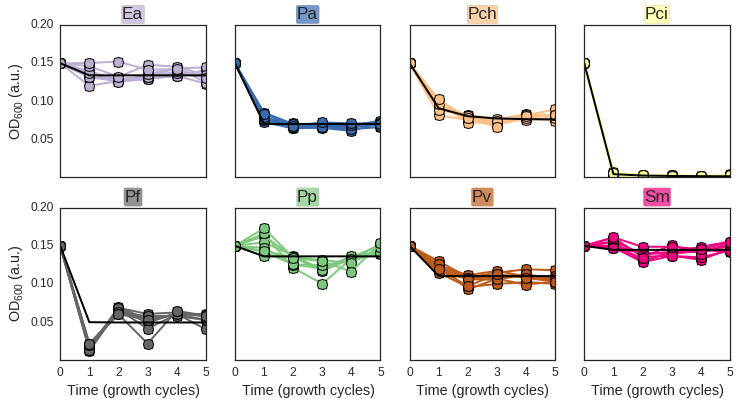

In [420]:
rs, cs = (2,4)
w = 3
fig, axs = subplots(rs, cs, figsize=(w*cs,w*rs))
for i in range(8):
    sps = species[i]
    r,c = unravel_index(i, (rs,cs))
    ax = axs[r,c]
    
    ys_obs = array([ods_singles.loc[sps].T.values]).transpose(1,2,0)
    
    sol = single_fits[sps]
    
    r0 = single_fits_params.loc[sps, 'r']
    k0 = single_fits_params.loc[sps, 'k']
    x0 = r_[r0,k0]
    x_target = r_[r0,k0]
    l = .1
    args = (ys_obs, t_trans, dil, None, None, diag(ones(1)), None, l, x_target)
#     print x0, objective_serial(x0, *args)
#     print sol.x, objective_serial(sol.x, *args)
    
    r_fit, k_fit, A_fit = unpack_params(1, sol.x, None, None, diag(ones(1)))
    ys_fit = LV_sim(r_fit, k_fit, A_fit, y0s=ys_obs[:,0], n_trans=5)

    for y, y_fit in zip(ys_obs, ys_fit):
        ax.plot(y, '-o', lw=2, color=species_colors[i], ms=10, mec='k', mew=1)

    ax.plot(ys_fit[0], 'k-', lw=2, color='k', ms=10, mec='k', mew=1)
    
#     sns.despine(ax=ax)
    ax.set_ylim(1e-3,.2)  
#     ax.set_yscale('log')

    ax.text(.5, 1.02, species[i], size='x-large', 
            ha='center', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[i], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),)

    ax.set_xticks([])
    ax.set_yticks([])
    
    if ax.is_first_col():
        ax.set_ylabel('OD$_{\mathregular{600}}$ (a.u.)', size='large')
        ax.set_yticks([.05, .1, .15, .2])
        setp(ax.get_yticklabels(), fontsize='medium')
        
    if ax.is_last_row():
        ax.set_xlabel('Time (growth cycles)', size='large')
        ax.set_xticks(range(6))
        setp(ax.get_xticklabels(), fontsize='medium')

        
# savefig(fig_out_path + 'monculture_fits.2016-07-28.png', dpi=300, bbox_inches='tight')

(0.001, 0.2)

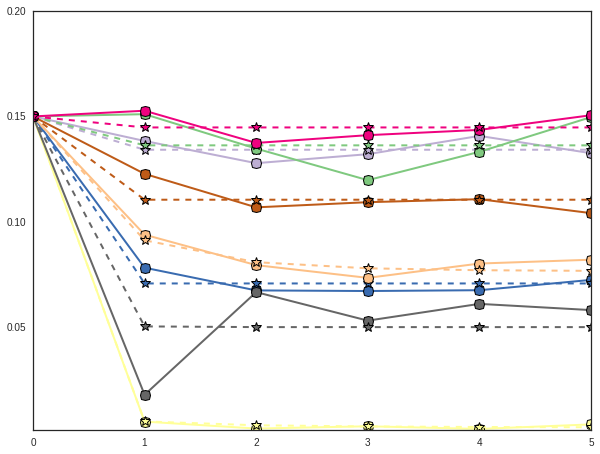

In [271]:
fig, ax = subplots(figsize=(10,7.5))
for i in range(8):
    sps = species[i]
    
    ys_obs = array([ods_singles.loc[sps].T.values]).transpose(1,2,0)
    
    sol = single_fits[sps]
    
    r0 = single_fits_params.loc[sps, 'r']
    k0 = single_fits_params.loc[sps, 'k']
    x0 = r_[r0,k0]
    x_target = r_[r0,k0]
    l = .1
    args = (ys_obs, t_trans, dil, None, None, diag(ones(1)), None, l, x_target)
#     print x0, objective_serial(x0, *args)
#     print sol.x, objective_serial(sol.x, *args)
    
    r_fit, k_fit, A_fit = unpack_params(1, sol.x, None, None, diag(ones(1)))
    ys_fit = LV_sim(r_fit, k_fit, A_fit, y0s=ys_obs[:,0], n_trans=5)

#     for y, y_fit in zip(ys_obs, ys_fit):
#         ax.plot(y, '-o', lw=2, c=species_colors[i])

    ax.plot(nanmedian(ys_obs, axis=0), '-o', lw=2, color=species_colors[i], ms=10, mec='k', mew=1)
    ax.plot(ys_fit[0], 'k--*', lw=2, color=species_colors[i], ms=10, mec='k', mew=1)    
    
    
#     ods_singles.iloc[i,:,:].median(axis=1).plot(legend=False, ax=ax, color=species_colors[i], 
#                                                 lw=3, marker='o', ms=10)
# ax.set_yscale('log')
ax.set_ylim(1e-3,.2)

### pairs 

In [45]:
afile = 'sim/LV_alpha.csv'
A_all = pd.read_csv(afile, index_col=0)

r_all = single_fits_params['r']
k_all = single_fits_params['k']

In [46]:
A_all.to_excel('../manuscript/gLV_params.A.xlsx', merge_cells=False, float_format='%.3f')

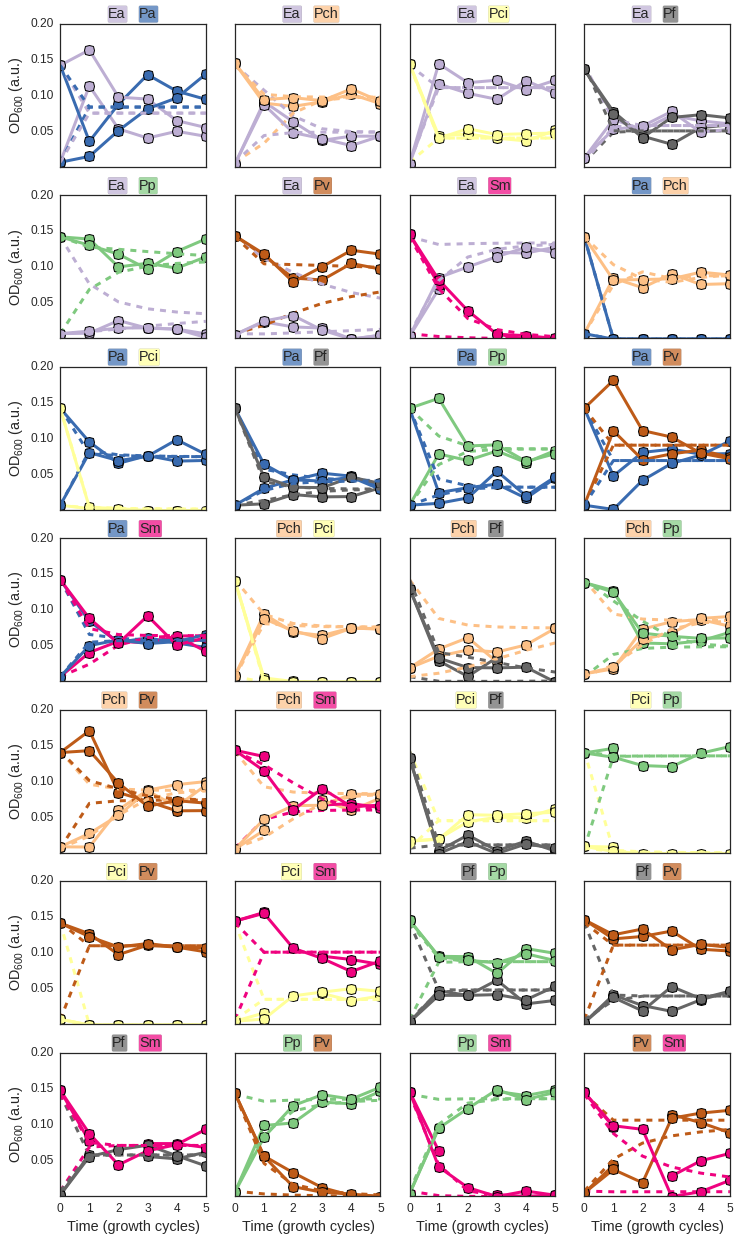

In [49]:
nr, nc = (7,4)
w = 3
fig, axs = subplots(nr, nc, figsize=(w*nc,w*nr))

for i, sps in enumerate(combinations(range(8),2)):
    cs = [species_colors[s] for s in sps]
    r,c = unravel_index(i, (nr,nc))
    ax = axs[r,c]
    ax.set_color_cycle(cs)
    
    if 1 in sps:
        pair_data = get_pair_data(array(sps), pair_partial_OD_pa, new_pa=True)
    else:
        pair_data = get_pair_data(array(sps), pair_partial_OD)
        
    sps_names = [species[s] for s in sps]
    r = r_all[sps_names]
    k = k_all[sps_names]
    A = A_all.loc[sps_names, sps_names]
    pair_data_fit = LV_sim(r, k, A, n_trans=5)    
    
    for ys, ys_fit in zip(pair_data, pair_data_fit): ### since fit data is shorter, cuts off the plotting of some of the observed data
        ax.plot(ys, '-o', ms=10, mec='k', mew=1, lw=3)
        ax.plot(ys_fit, '--', lw=3)
    
#     sns.despine(ax=ax)
    ax.set_ylim(1e-3,.2)  
#     ax.set_yscale('log')
    
    s1,s2 = sps
    ax.text(.45, 1.02, species[s1], size='large', 
            ha='right', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s1], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )
    ax.text(.55, 1.02, species[s2], size='large', 
            ha='left', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s2], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )

    ax.set_xticks([])
    ax.set_yticks([])
    
    if ax.is_first_col():
        ax.set_ylabel('OD$_{\mathregular{600}}$ (a.u.)', size='large')
        ax.set_yticks([.05, .1, .15, .2])
        setp(ax.get_yticklabels(), fontsize='medium')
        
    if ax.is_last_row():
        ax.set_xlabel('Time (growth cycles)', size='large')
        ax.set_xticks(range(6))
        setp(ax.get_xticklabels(), fontsize='medium')
        
# savefig(fig_out_path + 'pair_fits.2016-07-28.png', dpi=300, bbox_inches='tight')

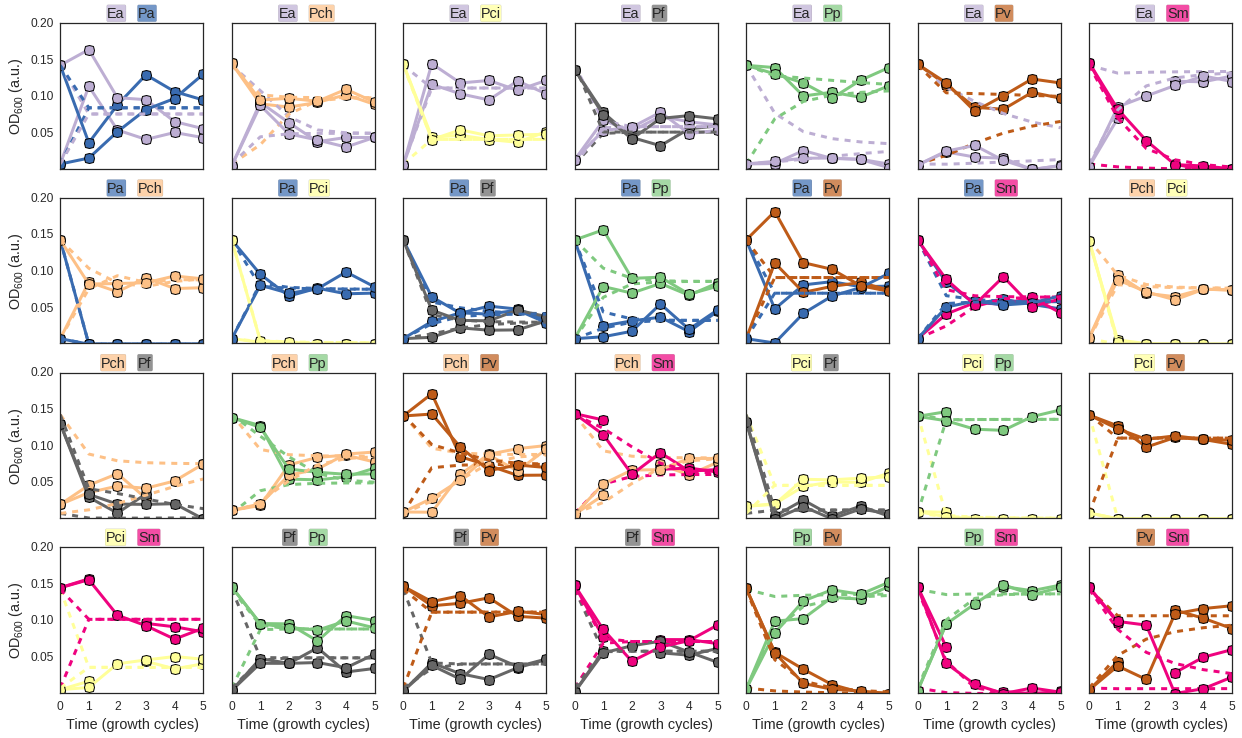

In [40]:
nr, nc = (4,7)
w = 3
fig, axs = subplots(nr, nc, figsize=(w*nc,w*nr))

for i, sps in enumerate(combinations(range(8),2)):
    cs = [species_colors[s] for s in sps]
    r,c = unravel_index(i, (nr,nc))
    ax = axs[r,c]
    ax.set_color_cycle(cs)
    
    if 1 in sps:
        pair_data = get_pair_data(array(sps), pair_partial_OD_pa, new_pa=True)
    else:
        pair_data = get_pair_data(array(sps), pair_partial_OD)
        
    sps_names = [species[s] for s in sps]
    r = r_all[sps_names]
    k = k_all[sps_names]
    A = A_all.loc[sps_names, sps_names]
    pair_data_fit = LV_sim(r, k, A, n_trans=5)    
    
    for ys, ys_fit in zip(pair_data, pair_data_fit):
        ax.plot(ys, '-o', ms=10, mec='k', mew=1, lw=3)
        ax.plot(ys_fit, '--', lw=3)
    
#     sns.despine(ax=ax)
    ax.set_ylim(1e-3,.2)  
#     ax.set_yscale('log')
    
    s1,s2 = sps
    ax.text(.45, 1.02, species[s1], size='large', 
            ha='right', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s1], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )
    ax.text(.55, 1.02, species[s2], size='large', 
            ha='left', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s2], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )

    ax.set_xticks([])
    ax.set_yticks([])
    
    if ax.is_first_col():
        ax.set_ylabel('OD$_{\mathregular{600}}$ (a.u.)', size='large')
        ax.set_yticks([.05, .1, .15, .2])
        setp(ax.get_yticklabels(), fontsize='medium')
        
    if ax.is_last_row():
        ax.set_xlabel('Time (growth cycles)', size='large')
        ax.set_xticks(range(6))
        setp(ax.get_xticklabels(), fontsize='medium')
        
# savefig(fig_out_path + 'pair_fits.2016-07-28.png', dpi=300, bbox_inches='tight')

### Export time series data to excel

In [ ]:
ods_singles.to_excel('../manuscript/data/monoculture_timeSeries.xlsx', na_rep='NA')

In [197]:
w = pd.ExcelWriter('../manuscript/data/pair_timeSeries.xlsx')

for i, sps in enumerate(combinations(range(8),2)):
    
    if 1 in sps:
        pair_data = get_pair_data(array(sps), pair_partial_OD_pa, new_pa=True)
    else:
        pair_data = get_pair_data(array(sps), pair_partial_OD)
    
    ss = [species[s] for s in sps]
    label = '_'.join(ss)
    for j,tmp in enumerate(pair_data):
        startrow = 0 if not j else j*7+1
        pd.DataFrame(tmp, columns=ss).to_excel(w, label, na_rep='NA', startrow=startrow, header=not bool(j))
        
w.close()

### Export last day data to excel

In [141]:
f = open('2015-05-21.EXP_34-Trio_competition/last_partial_OD.pick','r')

last_partial_OD_dict = pickle.load(f)
f.close()

last_partial_OD = pd.Panel4D(last_partial_OD_dict)
last_partial_OD

last_partial_OD

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 8 (labels) x 8 (items) x 10 (major_axis) x 8 (minor_axis)
Labels axis: 1 to 8
Items axis: A to H
Major_axis axis: 1 to 10
Minor_axis axis: Ea to Sm

In [142]:
vals0 = .15*array([.9, .05, .05])

def get_trio_data(inds, data, n, all_inds=None):
    '''
    
    inds : list (len=3)
        Indices of the desired species.
    n : int
        Number of transfers. 
        Only initial condition and last transfer data is available, so other transfers will be assigned nans.
    all_inds : list
        Indices of all the species to be included in the output data (species not in ind should contain only nans).
    '''
    if all_inds is None:
        all_inds = inds
        
    sps = array([species[i] for i in inds])
    all_sps = array([species[i] for i in all_inds])
    m = len(all_inds)
    trio_data = pd.Panel( full((6, n, m), nan), minor_axis=all_sps)
    for i,order in enumerate(permutations([0,1,2], r=3)):
        order = list(order)
        trio_data.iloc[i, 0].loc[sps] = vals0[[order.index(j) for j in range(3)]]
        s1,s2,s3 = inds[order]
        trio_data.iloc[i, -1].loc[all_sps] = data.iloc[s1,s2,s3].loc[all_sps]
        
    return trio_data.values

trio_data = get_trio_data(array(sps), last_partial_OD, 6)
trio_data

array([[[ 0.135     ,  0.0075    ,  0.0075    ],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [ 0.13732714,  0.00416143,  0.00416143]],

       [[ 0.135     ,  0.0075    ,  0.0075    ],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [ 0.15227184,  0.00304544,  0.00152272]],

       [[ 0.0075    ,  0.135     ,  0.0075    ],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [ 0.11156012,  0.0188794 ,  0.01373048]],

       [[ 0.0075    ,  0.135     ,  0.0075    ],
        [        nan,         nan,         nan],
        [     

In [152]:
last_partial_OD_new_pa = pd.read_csv('2016-02-03.EXP_41-competitions_with_new_Pa/partial_OD_t5.csv', index_col=(0,1,2))

def get_trio_data_41(inds, data, n):
    '''
    Need to return a panel of: time x condition x species
    Need to return a df of: condition x species
    '''
    inds = asarray(inds)
    s1, s2 = inds[inds!=1]
    pa_ind = where(inds==1)[0][0]
#     print pa_ind\
    
    c1, c2 = s1+1, s2+1
    r1, r2 = string.uppercase[s1], string.uppercase[s2]
    
    
    sps = array([species[i] for i in inds])
    m = len(sps)
    trio_data = pd.Panel( full((6, n, m), nan), minor_axis=sps)
    
    #*** The order of initial conditions where Pa is not the mahority may be flipped***
    for i,order in enumerate(permutations([0,1,2], r=3)):
        order = list(order)
        trio_data.iloc[i, 0].loc[sps] = vals0[[order.index(j) for j in range(3)]]
        s1,s2,s3 = inds[order]
        if i==0:
            vals = data.loc[1, r1, c2] if pa_ind==0 else data.loc[2, r1, c2]
        elif i==1:
            vals = data.loc[1, r2, c1] if pa_ind==0 else data.loc[3, r1, c2]
        elif i==2:
            vals = data.loc[1, r1, c2] if pa_ind==1 else data.loc[2, r1, c2]
        elif i==3:
            vals = data.loc[1, r2, c1] if pa_ind==1 else data.loc[3, r1, c2]
        elif i==4:
            vals = data.loc[2, r2, c1]
        elif i==5:
            vals = data.loc[3, r2, c1]
                
        trio_data.iloc[i, -1].loc[sps] = vals.loc[sps]  
        
    return trio_data.values
    

get_trio_data_41((0,1,4), last_partial_OD_new_pa, 6)[0]

array([[ 0.135     ,  0.0075    ,  0.0075    ],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [ 0.09083355,  0.        ,  0.08515645]])

In [167]:

w = pd.ExcelWriter('../manuscript/data/trio_lastTransfer.xlsx')

for i, sps in enumerate(combinations(range(8),3)):
    if 1 in sps:
        trio_data = get_trio_data_41(array(sps), last_partial_OD_new_pa, 6)
    else:
        trio_data = get_trio_data(array(sps), last_partial_OD, 6)

    
    ss = [species[s] for s in sps]
    label = '_'.join(ss)
    j = 0
    for tmp in trio_data:
        startrow = 0 if not j else j*3+1
        v = pd.DataFrame(tmp, columns=ss).dropna()
        if v.shape[0]>1:
            v.to_excel(w, label, na_rep='NA', startrow=startrow, header=not bool(j))
            j+=1

w.close()

In [198]:
data = last_partial_OD_new_pa

In [199]:
all_1 = pd.concat([data.loc[(4, r, i+1)] for i,r in enumerate(rows)], axis=1).T
all_2 = pd.concat([data.loc[(5, r, i+1)] for i,r in enumerate(rows)], axis=1).T

In [208]:

w = pd.ExcelWriter('../manuscript/data/7and8Species_lastTransfer.xlsx')

## 8 species
startrow = 0
for j in range(all_1.shape[0]):
    tmp = pd.DataFrame(0, columns=all_1.columns, index=[0,5])
    tmp.loc[0] = 0.15*0.05
    tmp.iloc[0, j] = 0.15*(1-7*0.05)
    tmp.iloc[-1] = all_1.iloc[j]
    
    startrow = 0 if not j else j*6+1
    tmp.to_excel(w, 'all_species', na_rep='NA', startrow=startrow, header=not bool(j))
    
    vals = all_2.iloc[j]
    tmp.iloc[-1] = vals if sum(vals) else nan
    rowadd = 4 if not j else 3 
    startrow += rowadd
    tmp.to_excel(w, 'all_species', na_rep='NA', startrow=startrow, header=False)
 

## 7 species
cols = arange(1,9)
for col in cols:
    to_drop = [rows[col-1]]
    od1 = data.xs((4,col), level=('Plate', 'Col')).drop(to_drop).drop(species[col-1], axis=1)
    od2 = data.xs((4,col), level=('Plate', 'Col')).drop(to_drop).drop(species[col-1], axis=1)

    sheet = '-%s'%species[col-1]
    
    startrow = 0
    for j in range(od1.shape[0]):
        tmp = pd.DataFrame(0, columns=od1.columns, index=[0,5])
        tmp.loc[0] = 0.15*0.05
        tmp.iloc[0, j] = 0.15*(1-6*0.05)
        tmp.iloc[-1] = od1.iloc[j]

        startrow = 0 if not j else j*6+1
        tmp.to_excel(w, sheet, na_rep='NA', startrow=startrow, header=not bool(j))

        vals = od2.iloc[j]
        tmp.iloc[-1] = vals if sum(vals) else nan
        rowadd = 4 if not j else 3 
        startrow += rowadd
        tmp.to_excel(w, sheet, na_rep='NA', startrow=startrow, header=False)

w.close()
    
    

## pair & trio layout stats

In [544]:
m,s = .6, .46
m,s = .65, .4
p = stats.norm(m, s).cdf(1)
print '<N(cox|no bis)> = ' , 28*p/(2-p)
print '<N(bis)>  = ' , 28*(1-p)**2

p2 = stats.norm(m, s).cdf(0)
print '<N(mutualism)>  = ' , 28*p2**2
print '<N(facilitation)>  = ' , 28*p2

<N(cox|no bis)> =  19.0277238643
<N(bis)>  =  1.0191905186
<N(mutualism)>  =  0.0759488706347
<N(facilitation)>  =  1.45827582363


In [551]:
m,s = .6, .46
# m,s = .65, .4
p = stats.norm(m, s).cdf(1)
print '<N(cox|no bis)> = ' , 28*p/(2-p)
print '<N(bis)>  = ' , 28*(1-p)**2

p2 = stats.norm(m, s).cdf(0)
print '<N(mutualism)>  = ' , 28*p2**2
print '<N(facilitation)>  = ' , 28*p2

<N(cox|no bis)> =  18.96926512
<N(bis)>  =  1.03508659942
<N(mutualism)>  =  0.258357254478
<N(facilitation)>  =  2.68961021811


In [572]:
ofile = 'sim/pair_outcome_stats.gLV.new.csv'
pair_stats = pd.read_csv(ofile, index_col=0)

ofile = 'sim/trio_layout_stats.gLV.new.csv'
layout_stats = pd.read_csv(ofile, index_col=0)

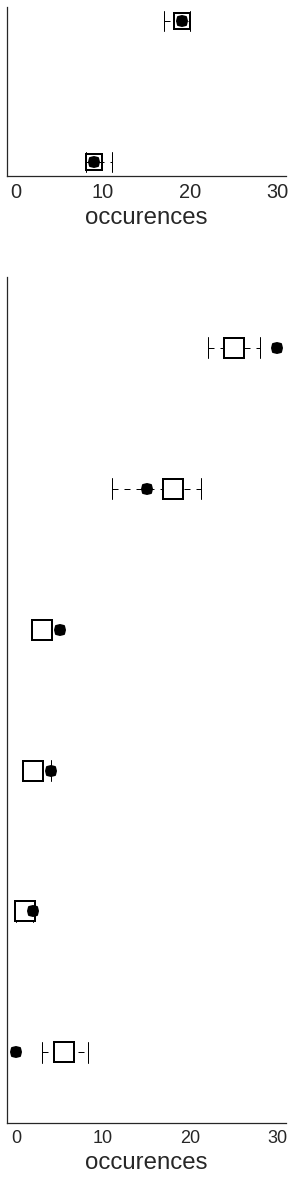

In [594]:
import seaborn as sns
sns.set_style('white')


fig = plt.figure(figsize=(5, 20)) 
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 5]) 

## pairs
ax = plt.subplot(gs[0])

e = .07
ys = linspace(0,1,2)[::-1]
observed = array([19, 9])
for i, out in enumerate(pair_stats):
    s = pair_stats[out]
    y = ys[i]
    x = s['50%']
    ax.plot(x,y, 's', mfc='none', mec='k', mew=2, ms=16)
    ax.plot(observed[i], y, 'o', mfc="k", mec='k', mew=2, ms=10)
    xmin, xmax = s['25%'], s['75%']
    ax.plot([xmin, xmax], [y]*2, 'k--', zorder=0, lw=1)
    for xx in [xmin, xmax]:
        ax.plot([xx]*2, [y-e, y+e], 'k', zorder=0, lw=1)
    
    
#     ax.annotate(observed[i], (observed[i],y),
#         ha='center', va='bottom',
#         xytext=(0,13), textcoords='offset points',
#         family='sans-serif', fontsize=16, color='k')

ax.set_xlim(-1, 31)
ax.set_ylim(-.1, 1.1)

ax.set_xticks([0, 10, 20, 30])
setp(ax.get_xticklabels(), fontsize=20)
ax.set_yticks([])
sns.despine(bottom=False)       
ax.set_xlabel('occurences', size=24)

## trios
ax = plt.subplot(gs[1])

e = .015
ys = linspace(0,1,6)[::-1]
observed = array([30, 15, 5, 4, 2, 0])
for i, layout in enumerate(layout_stats):
    s = layout_stats[layout]
    y = ys[i]
    x = s['50%']
    ax.plot(x,y, 's', mfc="w", mec='k', mew=2, ms=20)
    ax.plot(observed[i], y, 'o', mfc="k", mec='k', mew=2, ms=10)
    xmin, xmax = s['25%'], s['75%']
    ax.plot([xmin, xmax], [y]*2, 'k--', zorder=0, lw=1)
    for xx in [xmin, xmax]:
        ax.plot([xx]*2, [y-e, y+e], 'k', zorder=0, lw=1)
        
#     ax.annotate(observed[i], (observed[i],y),
#         ha='center', va='bottom',
#         xytext=(0,13), textcoords='offset points',
#         family='sans-serif', fontsize=16, color='k')
    
ax.set_xlim(-1, 31)
ax.set_ylim(-.1, 1.1)

ax.set_xticks([0, 10, 20, 30])
setp(ax.get_xticklabels(), fontsize=18)
ax.set_yticks([])
sns.despine(bottom=False)
ax.set_xlabel('occurences', size=24)

savefig(fig_out_path_sup + 'FigS6/panels.2016-08-03.png', dpi=300, bbox_inches='tight')

In [596]:
layout_stats

,1,2,3,4,5,-1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,24.850000,17.570000,3.060000,2.870000,1.420000,6.230000
std,3.998421,7.456615,2.004137,2.023374,1.408345,3.589702
min,12.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,11.000000,1.750000,1.000000,0.000000,3.000000
50%,25.000000,18.000000,3.000000,2.000000,1.000000,5.500000
75%,28.000000,21.250000,4.000000,4.000000,2.000000,8.250000
max,32.000000,41.000000,9.000000,10.000000,7.000000,17.000000


## Trio survival table

In [4]:
trio_outcomes = pd.read_csv('2016-02-03.EXP_41-competitions_with_new_Pa/trio_outcomes_combined_flat.csv', sep=';')
trio_outcomes.replace(-1, 5, inplace=True)

col_names =  trio_outcomes.columns

trio_outcomes  = trio_outcomes.reindex(columns=['species 3', 'species 2', 'species 1', 'layout', 'outcome final'])
trio_outcomes.columns = ['species A', 'species B', 'species C', 'layout', 'outcome final']

In [5]:
outcomes_sorted = trio_outcomes.sort_values(['layout', 'outcome final', 'species A', 'species B', 'species C'])

In [6]:
survival = outcomes_sorted.set_index(['species A', 'species B', 'species C'])
survival['species A'] = 0
survival['species B'] = 0
survival['species C'] = 0

In [7]:
for k, v in survival.iterrows():
    l = v['layout'] 
    o = v['outcome final']
    if l==1:
        if o==1:
            s = [1,1,0]
        elif o==2:
            s = [1,1,1]
        elif o==3:
            s=[0,1,1]
        elif o==4:
            s=[1,1,0]
        elif o==5:
            s=[-1,-1,-1]
    elif l==2:
        if o==1:
            s = [1,1,1]
        elif o==2:
            s = [0,1,1]
    elif l==3:
        if o==1:
            s = [0,1,1]
    elif l==4:
        if o==1:
            s = [1,0,0]
        elif o==2:
            s = [1,1,1]
    elif l==5:
        if o==1:
            s = [0,1,0]
    survival.loc[k].iloc[2:] = s
    
survival_only = survival.reindex(columns=[['species A', 'species B', 'species C']])

In [472]:
survival_only.to_excel('../manuscript/trio_survival.xlsx', merge_cells=False)

# Additional figures

## Trio accuracy pie

In [17]:
import pandas as pd
false_extinct = 8.4
false_survive = 9.5
correct = 56*3 - false_extinct - false_survive

acc = pd.Series([correct, false_extinct, false_survive])
acc/acc.sum()

0    0.893452
1    0.050000
2    0.056548
dtype: float64

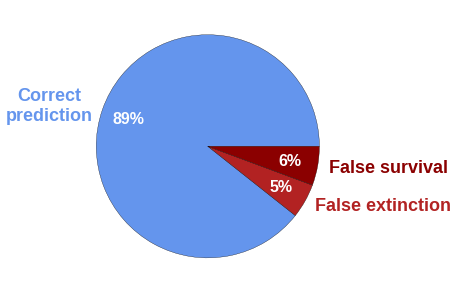

In [20]:
labels = ['Correct\nprediction', 'False extinction', 'False survival']
colors = ['CornflowerBlue','firebrick','darkred']
fig, ax = subplots(figsize=(5,5))
patches, texts, autotexts = ax.pie(acc, labels=labels, autopct='%1.f%%', pctdistance=.75, colors=colors)

setp(texts, fontsize=18, fontweight='bold', ma='center')
setp(autotexts, fontsize=16, fontweight='bold', color='w')

for t,c in zip(texts,colors):
    t.set_color(c)
    
savefig('trio_rule_accuracy_pie.png', dpi=300, bbox_inches='tight')

In [15]:
acc/acc.sum()

0    0.892857
1    0.050595
2    0.056548
dtype: float64

## 7|8 prediction quality no trio data

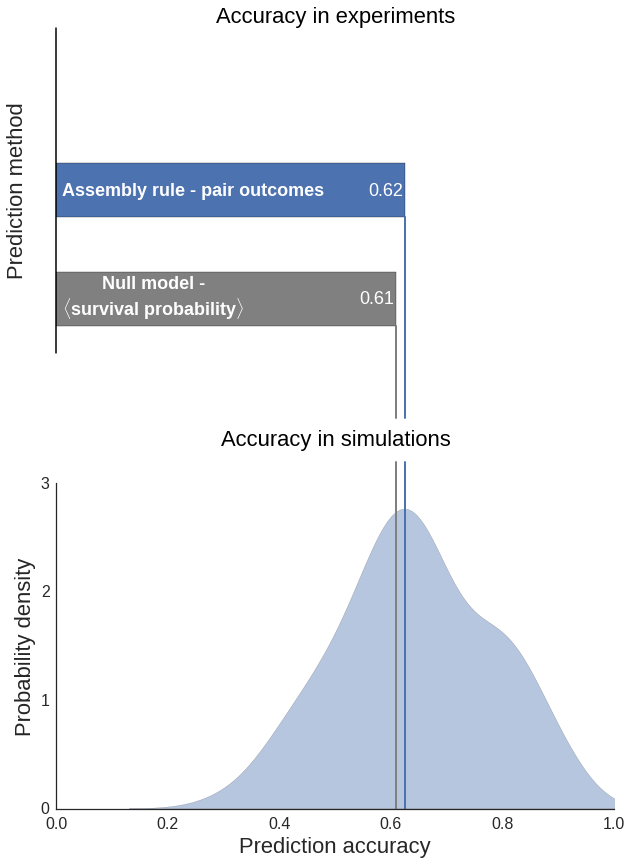

In [28]:
acc = pd.Series([accuracy_all_survive_sep, accuracy_rule_2_sep])

sns.set_style('white')
fig, axs = subplots(2, 1, figsize=(10,14), sharex='col')

labels = ['majority', 'rule2']
acolors = [acc_colors[l] for l in labels]

ax = axs[0]
acc.plot(kind='barh', color=acolors, ax=ax)

# ax.barh([0, .3], acc, height=.2, color=colors[:2])
ax.set_ylim(-.5,2.5)

ax.set_xlim(0,1)
ax.set_xticks([])
sns.despine(left=True, bottom=True, ax=ax)
ax.set_yticks([])
# ax.set_ylabel('Prediction accuracy\n in experiments', size=20, labelpad=10)
ax.plot([0]*2, (-.5,2.5), '-k', lw=1.5, clip_on=False)

labels = ['Null model -\n$\\langle$survival probability$\\rangle$', 
          'Assembly rule - pair outcomes', 
          'Assembly rule - trio outcomes']

x = 0.01
for i in range(2):
    ax.text(x, i, labels[i], size=18, weight='bold', 
            va='center', ha='left', ma='center', color='w')
    
#     ax.text(0.01, i, labels[i], size=18, weight='bold', 
#             va='center', ha='left', color='w')

    ax.text(acc[i]-.005, i, '%.2f'%acc[i], size=18,
        va='center', ha='right', color='w', zorder=10)


ax.text(.5, 2.6, 'Accuracy in experiments', size=22, 
        va='center', ha='center', ma='center', color='k')


ax.text(.5, -1.3, 'Accuracy in simulations', size=22, clip_on=False,
        va='center', ha='center', ma='center', color='k')

ax.set_yticks([0,1])
ax.set_yticklabels([10,11], color='w')
setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('Prediction method', size=22)


ax=axs[1]

nmax=100

a = .4
# sns.kdeplot(1-err_all_survive[:nmax], shade=True, lw=0, ax=ax, color=colors[0], alpha=a)
sns.kdeplot(1-err2[:nmax], shade=True, lw=0, ax=ax, color=acolors[1], alpha=a)
# sns.kdeplot(1-err3[:nmax], shade=True, lw=0, ax=ax, color=acolors[2], alpha=a)

ax.plot([accuracy_all_survive_sep]*2, (0,3.2), '-', lw=2,c=acolors[0], clip_on=False)
ax.plot([accuracy_all_survive_sep]*2, (3.6,4.45), '-', lw=2,c=acolors[0], clip_on=False)
ax.plot([accuracy_rule_2_sep]*2, (0,3.2), '-', lw=2, c=acolors[1], clip_on=False)
ax.plot([accuracy_rule_2_sep]*2, (3.6, 5.45), '-', lw=2, c=acolors[1], clip_on=False)
# ax.plot([accuracy_rule_3_sep]*2, (0, 6.45), '-', lw=2,c=acolors[2], clip_on=False)

ax.set_xticks(arange(0, 1.1, .2))
# ax.set_xticklabels(arange(.5, 1, .1))
ytcks = ax.set_yticks([0, 1, 2, 3])
setp(ax.get_xticklabels(), fontsize=16)
setp(ax.get_yticklabels(), fontsize=16)

# ax.set_ylabel('# occurrences', size=20)
ax.set_xlabel('Accuracy', size=20)
ax.set_xlim(0,1)
ax.set_ylim(0,3)

ax.set_ylabel('Probability density', size=22)
ax.set_xlabel('Prediction accuracy', size=22)

subplots_adjust(hspace=.4)

sns.despine(ax=ax, )

savefig('prediction_accuracy_septets.no_trio_info.png', dpi=300, bbox_inches='tight')

## Model cartoon

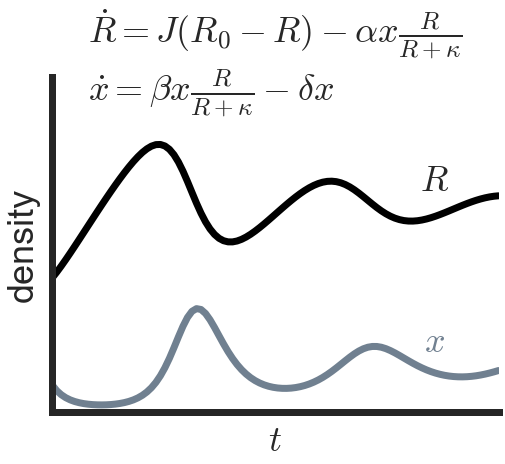

In [4]:

def LV_fun(x, t, r, k, A):
    dx = r*x*(1-A.dot(x)/k)
#     dx[dx<0] = 0 # growth rate can't be negative
    dx[x<=0] = 0
    return dx

def fun(t,x):
    R, y = x
    dR = J*(R0-R) - a*y*R/(R+k)
    dy =  b*a*y*R/(R+k) - d*y
    dx = array([dR, dy])
    dx[x<=0] = 0
    return dx

import scipy.integrate as spi
def integrate(fun, y0, t, args, jac=None):
    ode =  spi.ode(fun, jac)
    # BDF method suited to stiff systems of ODEs
    ode.set_integrator('vode', nsteps=500, method='bdf')
    ode.set_initial_value(y0,t[0])
    ode.set_f_params(*args)
    ode.set_jac_params(*args)

    nt = len(t)
    ys = [y0]
    for i in range(1, nt):
        t_step = t[i] - t[i-1]
        ode.integrate(ode.t + t_step)
        ys.append(ode.y)
    return array(ys)

J = .001
R0 = 1
k = 6
a = 1
b = 4
d = .1

x0 = array([.1,.02])
t = linspace(0,700, 100)

y = integrate(fun, x0, t, [])

c2 = 'slategrey'
lw = 7
fig, ax = subplots(figsize=(8,6))
ax.plot(t, y[:,0], 'k', lw=lw)
ax.plot(t, y[:,1], c2, lw=lw)

ax.set_ylim(0,.25)
sns.despine()
ax.set_xticklabels([])
ax.set_yticklabels([])
for axis in ['bottom','left']:
  ax.spines[axis].set_linewidth(lw)

fs = 36
ax.set_xlabel('$t$', size=fs)
ax.set_ylabel('density', size=fs)


ax.text(600, .16, '$R$', va='bottom', ha='center', size=fs)
ax.text(600, .04, '$x$', va='bottom', ha='center', size=fs, color=c2)

eq1 = r'$\dot{R} = J(R_0-R) - \alpha x \frac{R}{R+\kappa}$'
eq2 = r'$\dot{x} = \beta x \frac{R}{R+\kappa} - \delta x$'
eq = eq1 + '\n' + eq2

ax.text(350, .22, eq, va='bottom', ha='center', size=fs, ma='left')

savefig('model_cartoon.png', dpi=300, bbox_inches='tight', transparent=True)